In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import numpy as np
import json
from collections import defaultdict

# Symbolic execution results

In [2]:
labels = ['bancteian', 'ircbot', 'sillyp2p', 'sytro', 'simbot', 'FeakerStealer', 'sfone', 
          'lamer', 'RedLineStealer', 'RemcosRAT', 'Sodinokibi', 'delf', 'gandcrab', 'wabot', 'mirai']

methods= ['CSTOCH1', 'CSTOCH2', 'CSTOCH3', 'STOCH', 'WSELECT1', 'WSELECT2', 'WSELECT3', 'CDFS', 'CBFS']

df_original = pd.read_csv('./src/output/eval_SCDG_n/measurements.csv')
print(df_original)

       iter expl_method     family  \
0         0     CSTOCH1  bancteian   
1         0     CSTOCH2  bancteian   
2         0     CSTOCH3  bancteian   
3         0       STOCH  bancteian   
4         0    WSELECT1  bancteian   
...     ...         ...        ...   
11227     7    WSELECT2      sfone   
11228     7    WSELECT3      sfone   
11229     7        CDFS      sfone   
11230     7        CBFS      sfone   
11231     7     CSTOCH1  RemcosRAT   

                                           nameFileShort  tot_syscalls  \
0                       00013b0490c8d79ad771da5d99544dc2          2377   
1                       00013b0490c8d79ad771da5d99544dc2          2398   
2                       00013b0490c8d79ad771da5d99544dc2           297   
3                       00013b0490c8d79ad771da5d99544dc2          2265   
4                       00013b0490c8d79ad771da5d99544dc2           323   
...                                                  ...           ...   
11227                   0

In [3]:
for m in methods:
    
    v = len(set(list(df_original.loc[df_original["expl_method"]== m]["nameFileShort"].values)))
    print(f"{m} & {(v/583)*100:.2f}\% \\\\ \hline")

CSTOCH1 & 96.74\% \\ \hline
CSTOCH2 & 96.57\% \\ \hline
CSTOCH3 & 96.57\% \\ \hline
STOCH & 96.05\% \\ \hline
WSELECT1 & 94.34\% \\ \hline
WSELECT2 & 98.11\% \\ \hline
WSELECT3 & 96.05\% \\ \hline
CDFS & 94.17\% \\ \hline
CBFS & 97.77\% \\ \hline


In [4]:
len(set(list(df_original["nameFileShort"].values)))

583

In [5]:
a = list(df_original[["family","nameFileShort"]].values)
print(len(a))

boo = {}

for e in a:
    boo[e[0]] = []
    
c = 0
for e in a:
    if e[1] not in boo[e[0]]:
        boo[e[0]].append(e[1])
        c+=1

print(c)
# print(boo)
for t in boo:
    print(f"| {t} : {len(boo[t])} |", end='')

11232
583
| bancteian : 42 || ircbot : 36 || sillyp2p : 42 || sytro : 42 || simbot : 42 || FeakerStealer : 41 || sfone : 32 || lamer : 52 || RedLineStealer : 32 || RemcosRAT : 43 || Sodinokibi : 3 || delf : 44 || nitol : 50 || gandcrab : 42 || wabot : 40 |

In [6]:
a = list(df_original[["expl_method","family","nameFileShort"]].values)
print(len(a))

boo = {}

for e in a:
    boo[(e[0],e[1])] = []
    
c = 0
for e in a:
    if e[2] not in boo[(e[0],e[1])]:
        boo[(e[0],e[1])].append(e[2])
        c+=1

print(c)
# print(boo)
for t in boo:
    print(f"{t[1]}, {t[0]} : {len(boo[t])}")

11232
5051
bancteian, CSTOCH1 : 42
bancteian, CSTOCH2 : 42
bancteian, CSTOCH3 : 42
bancteian, STOCH : 42
bancteian, WSELECT1 : 42
bancteian, WSELECT2 : 42
bancteian, WSELECT3 : 42
bancteian, CDFS : 42
bancteian, CBFS : 42
ircbot, CSTOCH1 : 36
ircbot, CSTOCH2 : 36
ircbot, CSTOCH3 : 36
ircbot, STOCH : 36
ircbot, WSELECT1 : 36
ircbot, WSELECT2 : 36
ircbot, WSELECT3 : 36
ircbot, CDFS : 36
ircbot, CBFS : 36
sillyp2p, CSTOCH1 : 42
sillyp2p, CSTOCH2 : 42
sillyp2p, CSTOCH3 : 42
sillyp2p, STOCH : 42
sillyp2p, WSELECT1 : 42
sillyp2p, WSELECT2 : 42
sillyp2p, WSELECT3 : 42
sillyp2p, CDFS : 42
sillyp2p, CBFS : 41
sytro, CSTOCH1 : 42
sytro, CSTOCH2 : 42
sytro, CSTOCH3 : 42
sytro, STOCH : 42
sytro, WSELECT1 : 42
sytro, WSELECT2 : 42
sytro, WSELECT3 : 42
sytro, CDFS : 42
sytro, CBFS : 42
simbot, CSTOCH1 : 42
simbot, CSTOCH2 : 42
simbot, CSTOCH3 : 42
simbot, STOCH : 42
simbot, WSELECT1 : 42
simbot, WSELECT2 : 42
simbot, WSELECT3 : 42
simbot, CDFS : 42
simbot, CBFS : 42
FeakerStealer, CSTOCH1 : 41
Feake

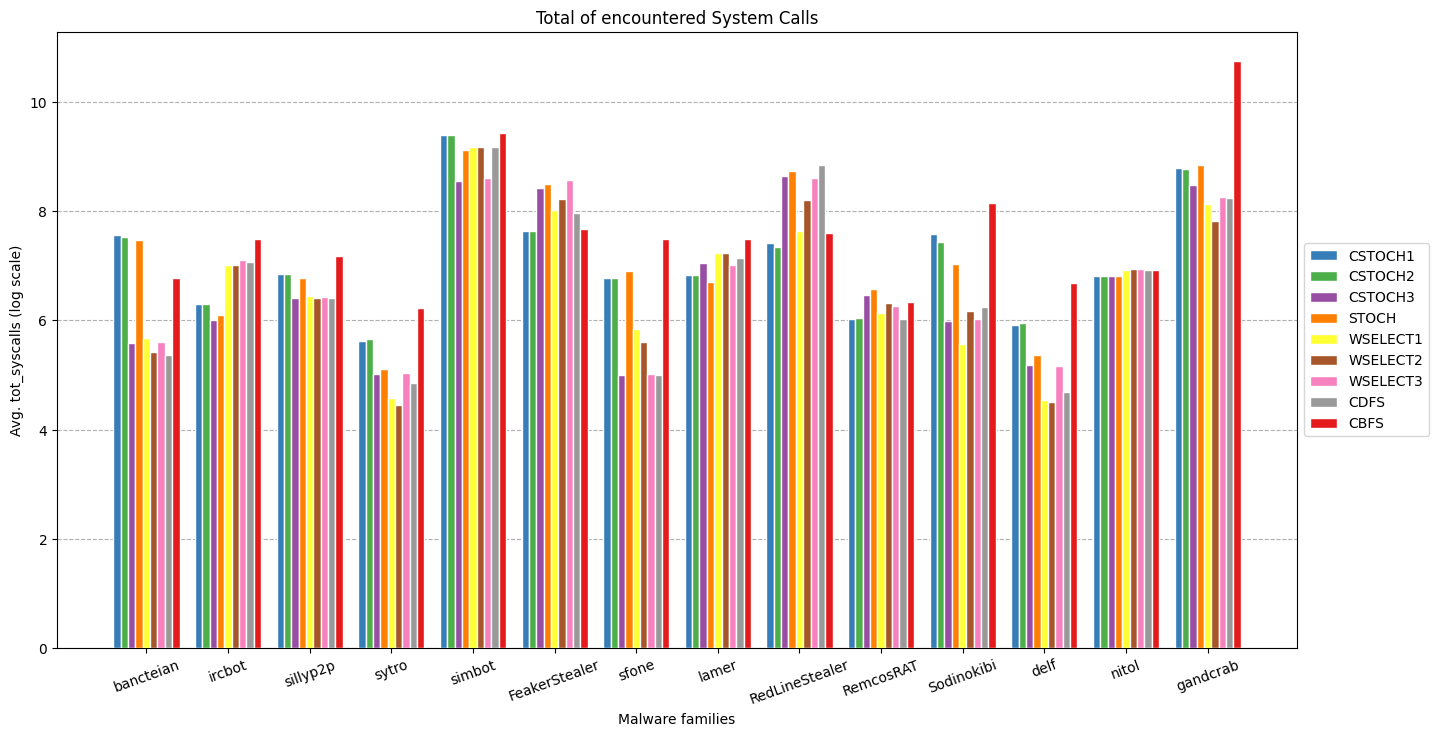

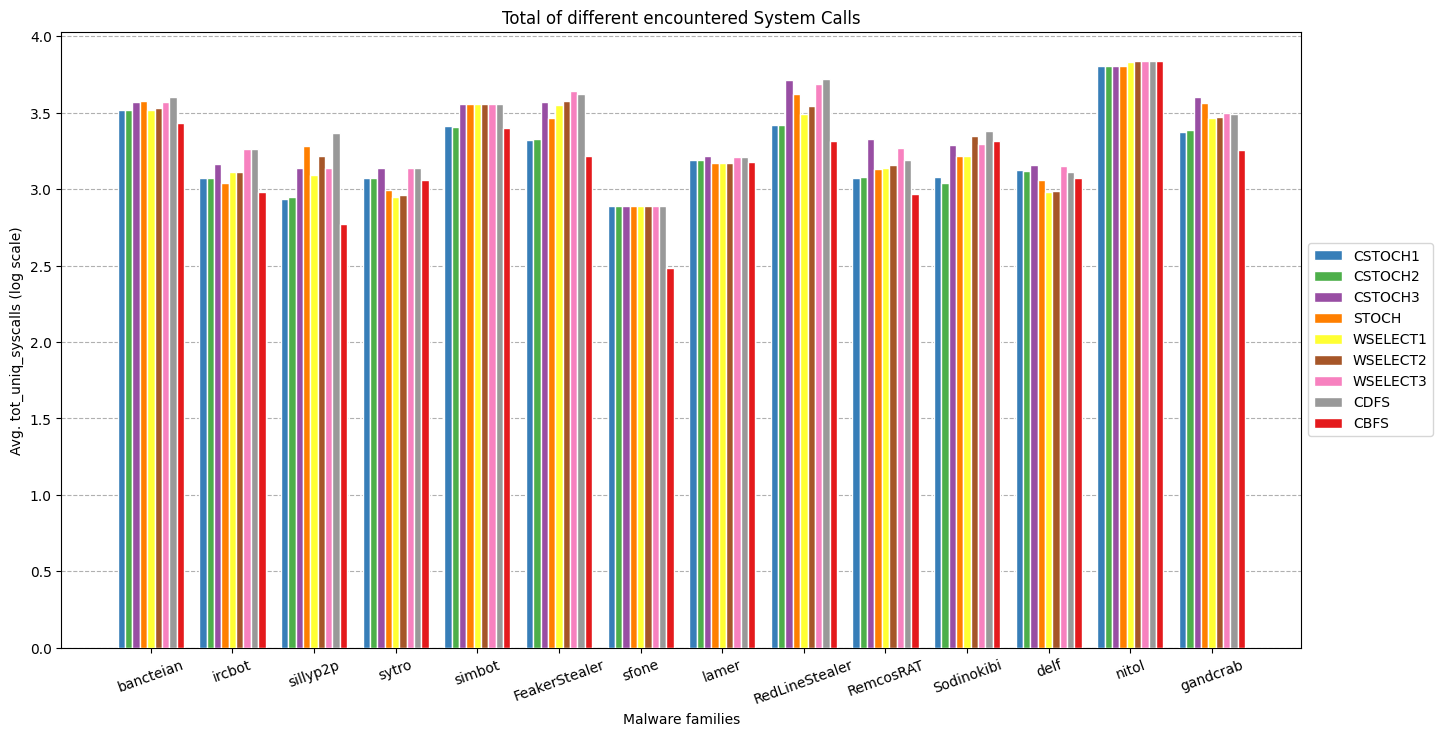

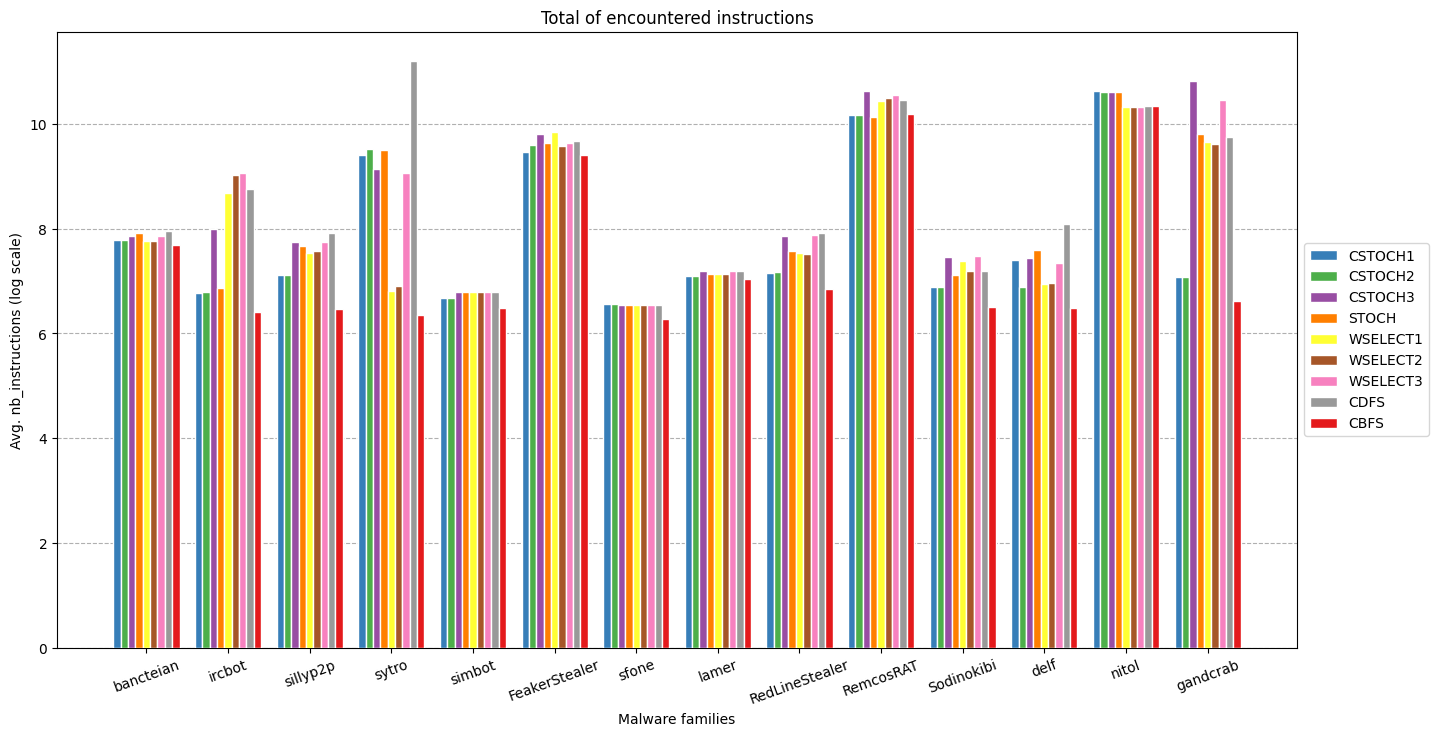

In [7]:
metrics = ["tot_syscalls","tot_uniq_syscalls", "nb_instructions"]

fams = ['bancteian', 'ircbot', 'sillyp2p', 'sytro', 'simbot', 'FeakerStealer', 'sfone', 
        'lamer', 'RedLineStealer', 'RemcosRAT', 'Sodinokibi', 'delf', 'nitol', 'gandcrab']
# for f in labels:
# #     vals = df.loc[(df["expl_method"]==m) & (df["family"]==f)]["tot_syscalls"].mean()+
# fam = df.loc[df["family"]==f]

x = np.arange(len(fams))
for i in range(1, len(x)):
    x[i] = x[i-1] + 2
# print(x)

titles = {"tot_syscalls": "Total of encountered System Calls",
          "tot_uniq_syscalls":"Total of different encountered System Calls",
          "nb_instructions":"Total of encountered instructions"}
# df = df_original.loc[df_original["elapsed_time"] <= 800]

df = df_original.loc[((df_original["elapsed_time"] <= 700) & (df_original["elapsed_time"] >= 100))]

for metric in metrics:
    plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    y1 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH1"][metric].mean() for f in fams]
    y2 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH2"][metric].mean() for f in fams]
    y3 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH3"][metric].mean() for f in fams]
    y4 = [df.loc[df["family"]==f].loc[df["expl_method"]=="STOCH"][metric].mean() for f in fams]
    y5 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT1"][metric].mean() for f in fams]
    y6 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT2"][metric].mean() for f in fams]
    y7 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT3"][metric].mean() for f in fams]
    y8 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CDFS"][metric].mean() for f in fams]
    y9 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CBFS"][metric].mean() for f in fams]    
    width = 0.18
#     space = 0.05
    # plot data in grouped manner of bar type
    plt.bar(x-4*(width), np.log(y1), width, zorder=3, color="#377eb8", edgecolor='white')
    plt.bar(x-3*(width), np.log(y2), width, zorder=3, color="#4daf4a", edgecolor='white')
    plt.bar(x-2*(width), np.log(y3), width, zorder=3, color="#984ea3", edgecolor='white')
    plt.bar(x-width, np.log(y4), width, zorder=3, color="#ff7f00", edgecolor='white')
    plt.bar(x, np.log(y5), width, zorder=3, color="#ffff33", edgecolor='white')
    plt.bar(x+width, np.log(y6), width, zorder=3, color="#a65628", edgecolor='white')
    plt.bar(x+2*(width), np.log(y7), width, zorder=3, color="#f781bf", edgecolor='white')
    plt.bar(x+3*(width), np.log(y8), width, zorder=3, color="#999999", edgecolor='white')
    plt.bar(x+4*(width), np.log(y9), width, zorder=3, color="#e41a1c", edgecolor='white')
    plt.xticks(x, fams)
    plt.xlabel("Malware families")
    plt.ylabel("Avg. "+ metric + " (log scale)")
#     plt.legend(methods)
#     plt.legend(methods, loc='upper center', bbox_to_anchor=(0.5, -0.17),
#           fancybox=True, shadow=True, ncol=5)

    plt.legend(methods, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 20)
    plt.title(titles[metric])
    plt.savefig(metric+".svg", bbox_inches = 'tight')
    plt.show()
    
    

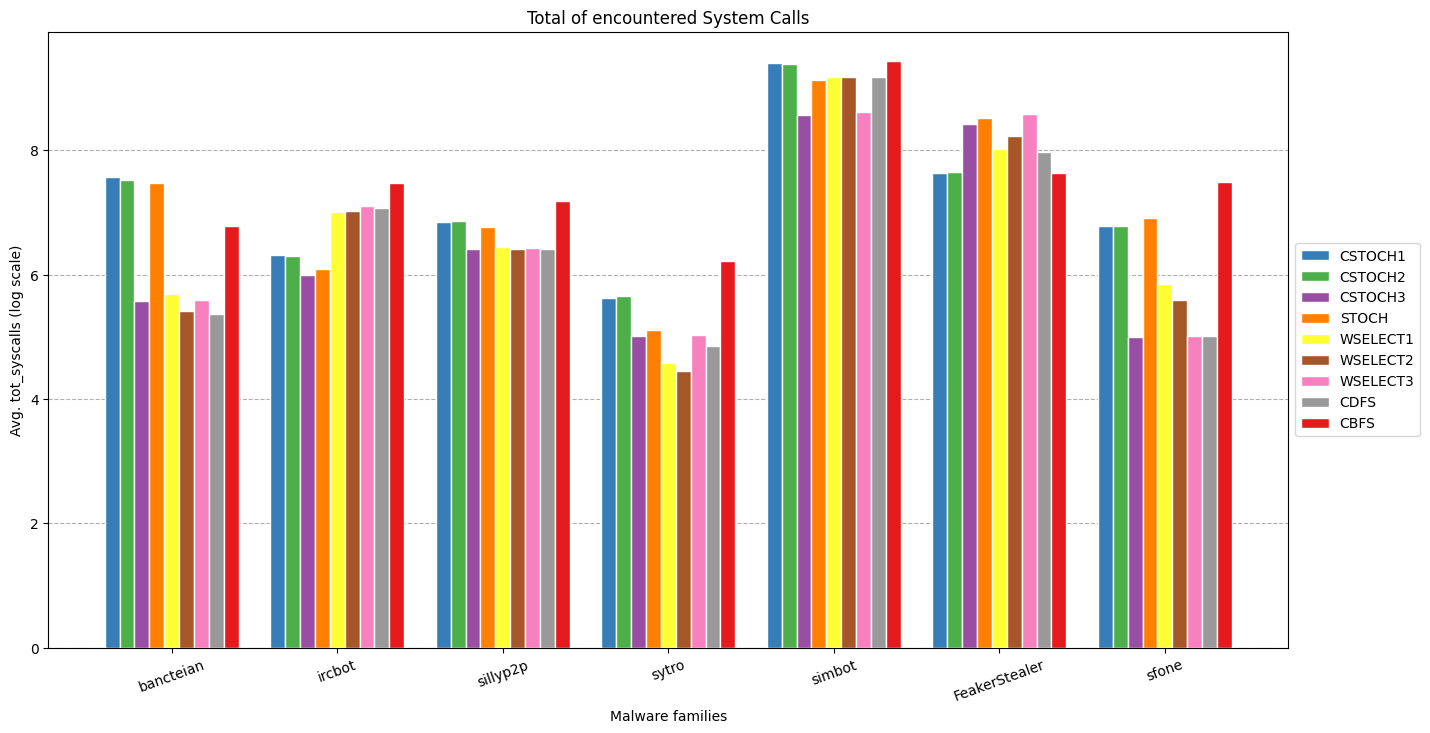

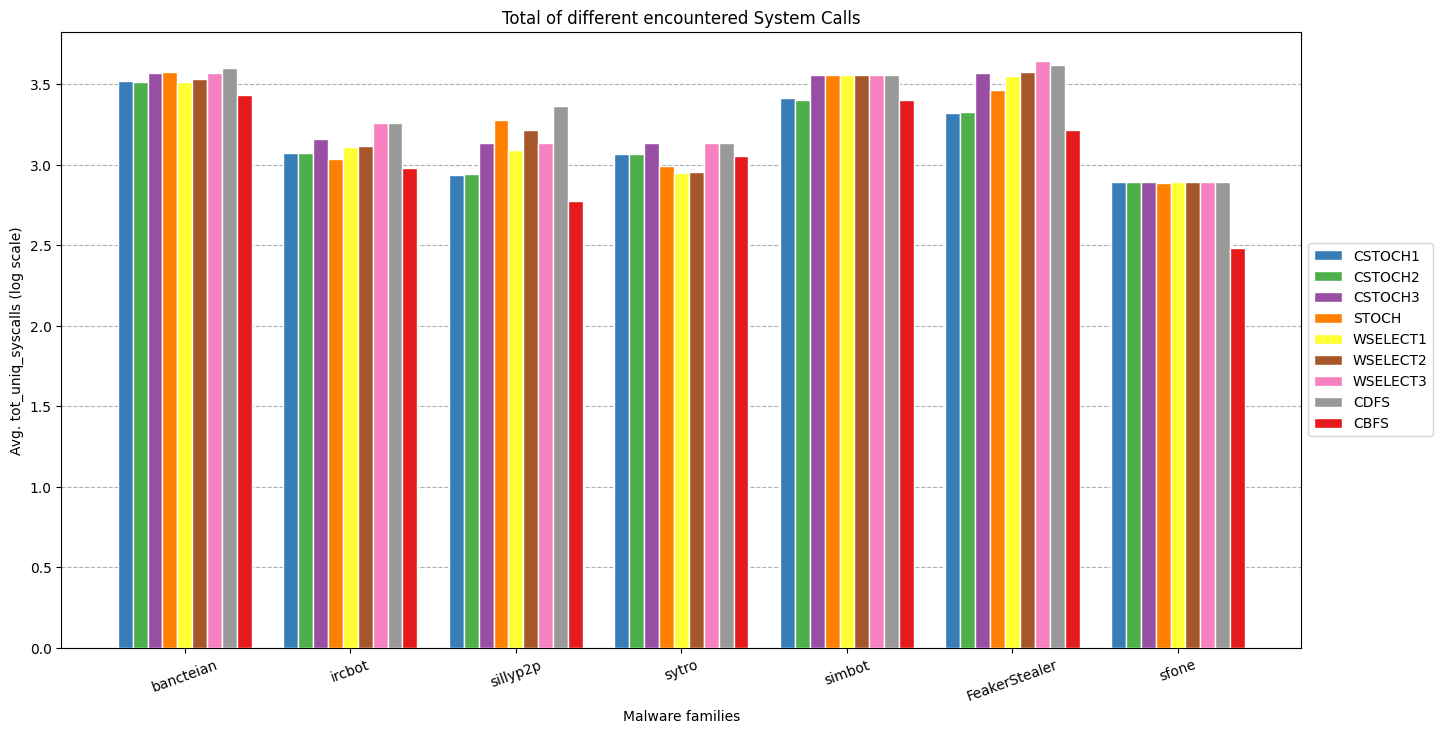

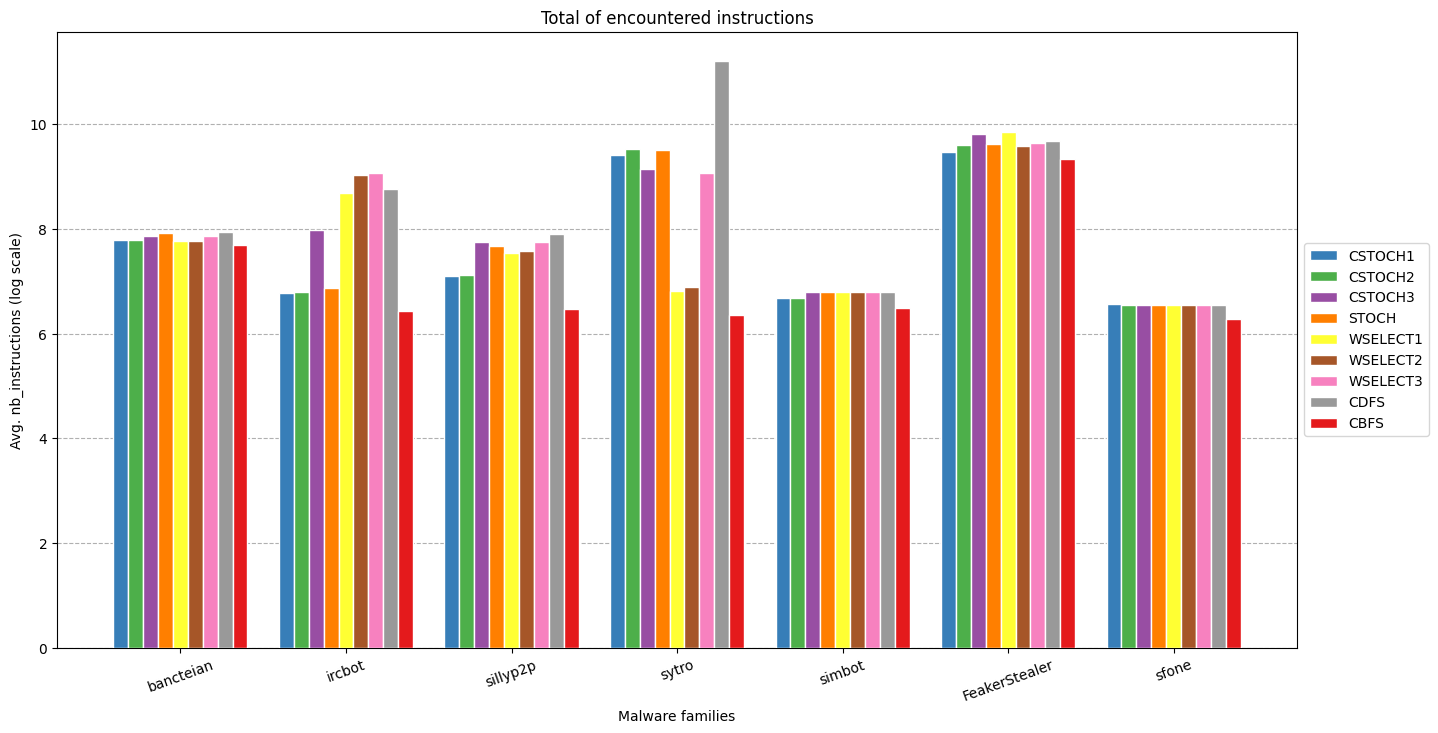

In [8]:
metrics = ["tot_syscalls","tot_uniq_syscalls", "nb_instructions"]

fams = ['bancteian', 'ircbot', 'sillyp2p', 'sytro', 'simbot', 'FeakerStealer', 'sfone']
#         'lamer', 'RedLineStealer', 'RemcosRAT', 'Sodinokibi', 'delf']
# for f in labels:
# #     vals = df.loc[(df["expl_method"]==m) & (df["family"]==f)]["tot_syscalls"].mean()+
# fam = df.loc[df["family"]==f]

x = np.arange(len(fams))
for i in range(1, len(x)):
    x[i] = x[i-1] + 2
# print(x)

titles = {"tot_syscalls": "Total of encountered System Calls",
          "tot_uniq_syscalls":"Total of different encountered System Calls",
          "nb_instructions":"Total of encountered instructions"}
# df = df_original.loc[df_original["elapsed_time"] <= 800]

df = df_original.loc[((df_original["elapsed_time"] <= 800) & (df_original["elapsed_time"] >= 300))]

for metric in metrics:
    plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    y1 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH1"][metric].mean() for f in fams]
    y2 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH2"][metric].mean() for f in fams]
    y3 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH3"][metric].mean() for f in fams]
    y4 = [df.loc[df["family"]==f].loc[df["expl_method"]=="STOCH"][metric].mean() for f in fams]
    y5 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT1"][metric].mean() for f in fams]
    y6 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT2"][metric].mean() for f in fams]
    y7 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT3"][metric].mean() for f in fams]
    y8 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CDFS"][metric].mean() for f in fams]
    y9 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CBFS"][metric].mean() for f in fams]    
    width = 0.18
#     space = 0.05
    # plot data in grouped manner of bar type
    plt.bar(x-4*(width), np.log(y1), width, zorder=3, color="#377eb8", edgecolor='white')
    plt.bar(x-3*(width), np.log(y2), width, zorder=3, color="#4daf4a", edgecolor='white')
    plt.bar(x-2*(width), np.log(y3), width, zorder=3, color="#984ea3", edgecolor='white')
    plt.bar(x-width, np.log(y4), width, zorder=3, color="#ff7f00", edgecolor='white')
    plt.bar(x, np.log(y5), width, zorder=3, color="#ffff33", edgecolor='white')
    plt.bar(x+width, np.log(y6), width, zorder=3, color="#a65628", edgecolor='white')
    plt.bar(x+2*(width), np.log(y7), width, zorder=3, color="#f781bf", edgecolor='white')
    plt.bar(x+3*(width), np.log(y8), width, zorder=3, color="#999999", edgecolor='white')
    plt.bar(x+4*(width), np.log(y9), width, zorder=3, color="#e41a1c", edgecolor='white')
    plt.xticks(x, fams)
    plt.xlabel("Malware families")
    plt.ylabel("Avg. "+ metric + " (log scale)")
#     plt.legend(methods)
#     plt.legend(methods, loc='upper center', bbox_to_anchor=(0.5, -0.17),
#           fancybox=True, shadow=True, ncol=5)

    plt.legend(methods, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 20)
    plt.title(titles[metric])
    plt.savefig(metric+".svg", bbox_inches = 'tight')
    plt.show()

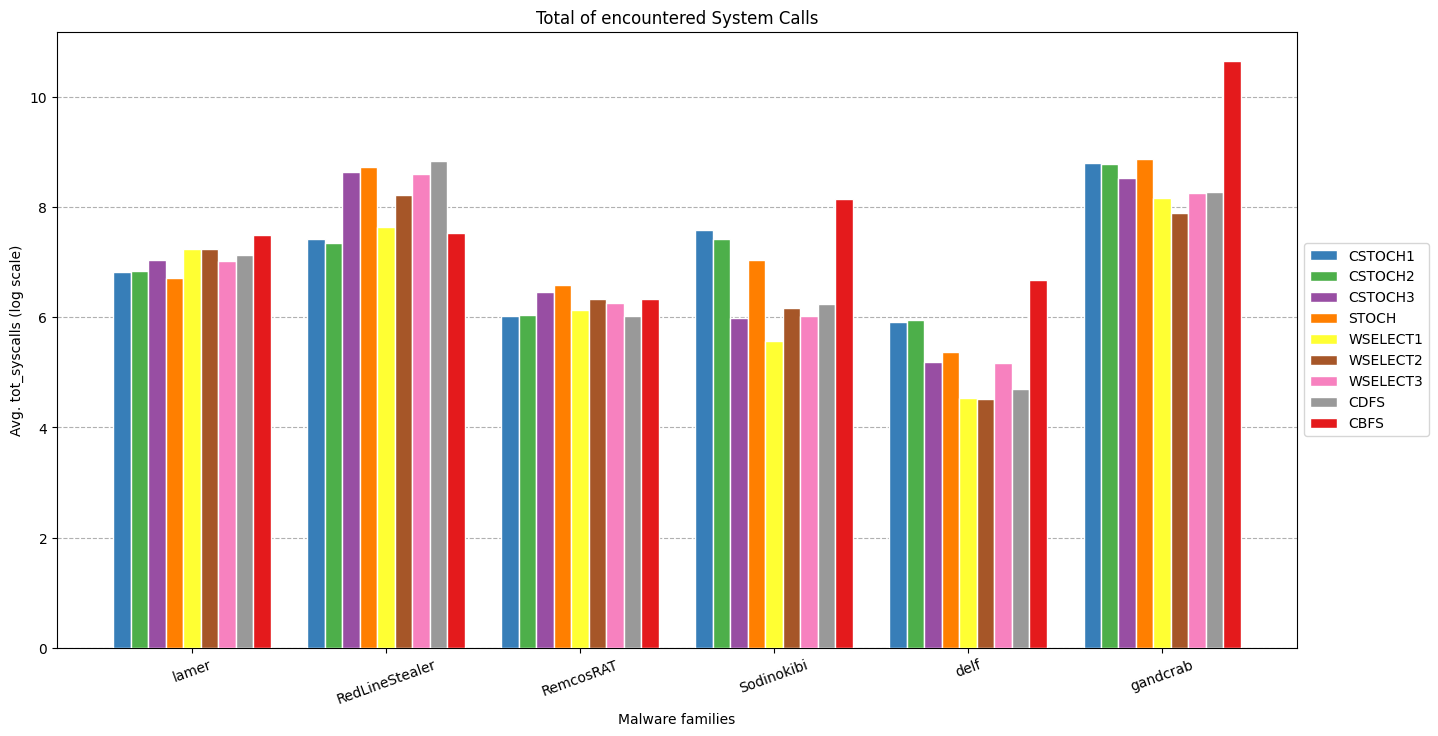

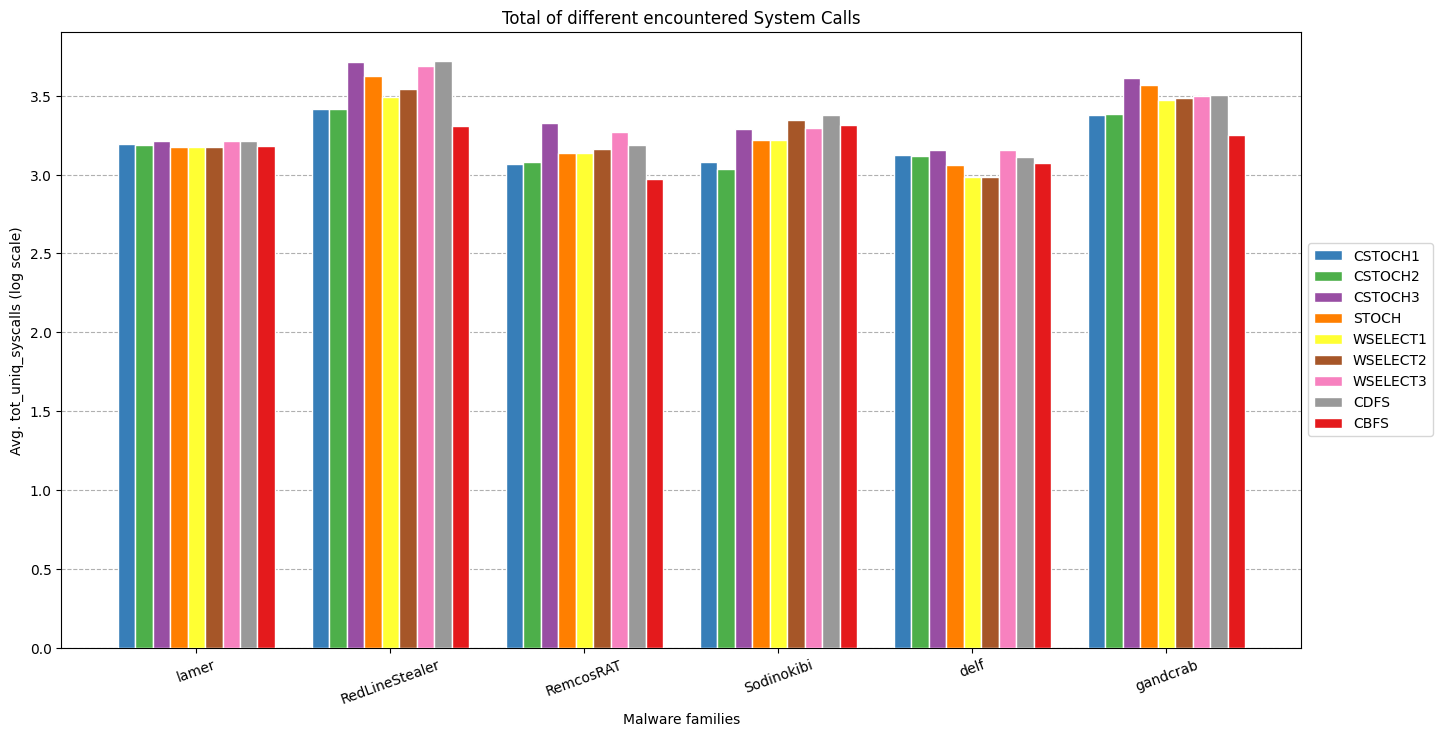

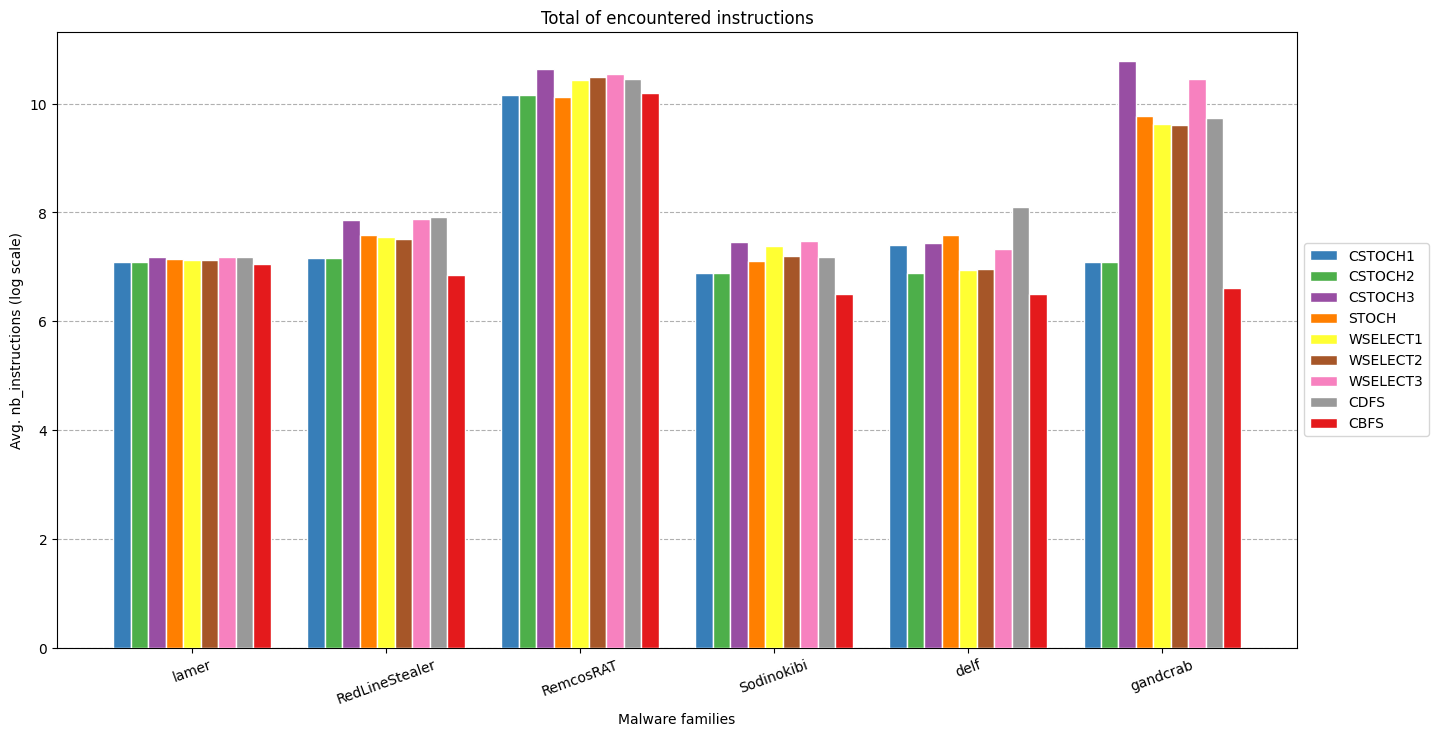

In [9]:
metrics = ["tot_syscalls","tot_uniq_syscalls", "nb_instructions"]

fams = [#'bancteian', 'ircbot', 'sillyp2p', 'sytro', 'simbot', 'FeakerStealer', 'sfone', 
        'lamer', 'RedLineStealer', 'RemcosRAT', 'Sodinokibi', 'delf', 'gandcrab',]
# for f in labels:
# #     vals = df.loc[(df["expl_method"]==m) & (df["family"]==f)]["tot_syscalls"].mean()+
# fam = df.loc[df["family"]==f]

x = np.arange(len(fams))
for i in range(1, len(x)):
    x[i] = x[i-1] + 2
# print(x)

titles = {"tot_syscalls": "Total of encountered System Calls",
          "tot_uniq_syscalls":"Total of different encountered System Calls",
          "nb_instructions":"Total of encountered instructions"}
# df = df_original.loc[df_original["elapsed_time"] <= 800]

df = df_original.loc[((df_original["elapsed_time"] <= 800) & (df_original["elapsed_time"] >= 300))]

for metric in metrics:
    plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    y1 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH1"][metric].mean() for f in fams]
    y2 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH2"][metric].mean() for f in fams]
    y3 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH3"][metric].mean() for f in fams]
    y4 = [df.loc[df["family"]==f].loc[df["expl_method"]=="STOCH"][metric].mean() for f in fams]
    y5 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT1"][metric].mean() for f in fams]
    y6 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT2"][metric].mean() for f in fams]
    y7 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT3"][metric].mean() for f in fams]
    y8 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CDFS"][metric].mean() for f in fams]
    y9 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CBFS"][metric].mean() for f in fams]     
    width = 0.18
#     space = 0.05
    # plot data in grouped manner of bar type
    plt.bar(x-4*(width), np.log(y1), width, zorder=3, color="#377eb8", edgecolor='white')
    plt.bar(x-3*(width), np.log(y2), width, zorder=3, color="#4daf4a", edgecolor='white')
    plt.bar(x-2*(width), np.log(y3), width, zorder=3, color="#984ea3", edgecolor='white')
    plt.bar(x-width, np.log(y4), width, zorder=3, color="#ff7f00", edgecolor='white')
    plt.bar(x, np.log(y5), width, zorder=3, color="#ffff33", edgecolor='white')
    plt.bar(x+width, np.log(y6), width, zorder=3, color="#a65628", edgecolor='white')
    plt.bar(x+2*(width), np.log(y7), width, zorder=3, color="#f781bf", edgecolor='white')
    plt.bar(x+3*(width), np.log(y8), width, zorder=3, color="#999999", edgecolor='white')
    plt.bar(x+4*(width), np.log(y9), width, zorder=3, color="#e41a1c", edgecolor='white')
    plt.xticks(x, fams)
    plt.xlabel("Malware families")
    plt.ylabel("Avg. "+ metric + " (log scale)")
#     plt.legend(methods)
#     plt.legend(methods, loc='upper center', bbox_to_anchor=(0.5, -0.17),
#           fancybox=True, shadow=True, ncol=5)

    plt.legend(methods, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 20)
    plt.title(titles[metric])
    plt.savefig(metric+".svg", bbox_inches = 'tight')
    plt.show()

# Graphs analysis

In [10]:
files = !(ls ./src/output/eval_SCDG_n/CSTOCH/0/bancteian | grep SCDG_ | grep .json)
print(files)

["ls: cannot access './src/output/eval_SCDG_n/CSTOCH/0/bancteian': No such file or directory"]


In [11]:
# for e in files:
#     with open("./src/output/eval_SCDG_n/CSTOCH1/0/bancteian/{}".format(e), "r") as fd:
#         print(len(json.load(fd)["links"]))

In [12]:
# comparer, le nombre de edge, au sein d'une famille, pour chaque méthode
# {fam: {meth: nb, meth: nb, ...}, fam: ...}

In [13]:
data = defaultdict(lambda: defaultdict(lambda: {}))
print(data)

fams = ['bancteian', 'ircbot', 'sillyp2p', 'sytro', 'simbot', 'FeakerStealer', 'sfone', 
        'lamer', 'RedLineStealer', 'RemcosRAT', 'Sodinokibi', 'delf', 'nitol', 'gandcrab', 'wabot']
methods = ['CSTOCH1', 'CSTOCH2', 'CSTOCH3', 'STOCH', 'WSELECT1', 'WSELECT2', 'WSELECT3', 'CDFS', 'CBFS']
for i in range(1):
    for fam in fams:
        for meth in methods:

            path = "./src/output/eval_SCDG_n/{}/{}/{}".format(meth, i, fam)
            files = !(ls $path | grep SCDG_ | grep .json)
    #         print (files)
            nb_edges = []
            for e in files:
                with open("{}/{}".format(path, e), "r") as fd:
                    nb_edges.append(len(json.load(fd)["links"]))
            print(path)
            print(nb_edges)
            data[fam][meth] = sum(nb_edges)/len(nb_edges)

# for i in range(2, 6):
#     for fam in fams:
#         for meth in ["CSTOCH1", "CSTOCH2", "CSTOCH3", "STOCH"]:

#             path = "./src/output/eval_SCDG_n/{}/{}/{}".format(meth, i, fam)
#             files = !(ls $path | grep SCDG_ | grep .json)
#     #         print (files)
#             nb_edges = []
#             for e in files:
#                 with open("{}/{}".format(path, e), "r") as fd:
#                     nb_edges.append(len(json.load(fd)["links"]))
#             print(path)
#             print(nb_edges)
#             data[fam][meth] = sum(nb_edges)/len(nb_edges)

defaultdict(<function <lambda> at 0x7fba948b51f0>, {})
./src/output/eval_SCDG_n/CSTOCH1/0/bancteian
[100, 76, 173, 66, 123, 104, 92, 136, 95, 77, 87, 103, 101, 58, 119, 164, 142, 136, 72, 106]
./src/output/eval_SCDG_n/CSTOCH2/0/bancteian
[169, 66, 105, 104, 178, 78, 101, 100, 98, 169, 145, 136, 69, 101, 84, 69, 53, 164, 97, 98]
./src/output/eval_SCDG_n/CSTOCH3/0/bancteian
[150, 142, 128, 152, 142, 152, 129, 128, 128, 149, 128, 150, 128, 140, 150, 142, 152, 131, 128, 150]
./src/output/eval_SCDG_n/STOCH/0/bancteian
[131, 89, 124, 161, 114, 111, 62, 97, 116, 113, 77, 105, 157, 72, 96, 74, 122, 131, 75, 104]
./src/output/eval_SCDG_n/WSELECT1/0/bancteian
[179, 156, 138, 142, 139, 114, 154, 132, 179, 176, 156, 156, 133, 154, 154, 152, 133, 135, 154, 178]
./src/output/eval_SCDG_n/WSELECT2/0/bancteian
[118, 107, 141, 115, 101, 95, 141, 115, 102, 107, 135, 115, 115, 119, 115, 120, 102, 117, 107, 115]
./src/output/eval_SCDG_n/WSELECT3/0/bancteian
[152, 152, 150, 131, 150, 152, 132, 128, 151, 151

./src/output/eval_SCDG_n/CDFS/0/sfone
[34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34]
./src/output/eval_SCDG_n/CBFS/0/sfone
[455, 464, 458, 488, 467, 487, 458, 455, 487, 451, 465, 479, 452, 448, 467, 444, 476, 464, 449, 463]
./src/output/eval_SCDG_n/CSTOCH1/0/lamer
[4729, 6220, 4214, 3687, 7806, 92, 5709]
./src/output/eval_SCDG_n/CSTOCH2/0/lamer
[4597, 6018, 7646, 5720, 53, 4525]
./src/output/eval_SCDG_n/CSTOCH3/0/lamer
[21438, 22908, 22912, 21438, 21438, 21438, 22912, 22912, 21438, 21438, 22912, 22733, 22908, 78, 22733, 21438, 22912, 22912, 21438, 22912]
./src/output/eval_SCDG_n/STOCH/0/lamer
[47]
./src/output/eval_SCDG_n/WSELECT1/0/lamer
[35466, 40993, 34251, 40993, 34251, 35465, 40993, 39551, 40993, 34251, 34883, 34251, 34251, 40, 34251, 33424, 38667, 39739, 34248, 39733]
./src/output/eval_SCDG_n/WSELECT2/0/lamer
[34250, 39563, 39739, 34251, 40993, 35465, 39729, 40993, 41231, 40374, 40205, 34251, 34452, 41, 34452, 34250, 34251, 39733, 34251, 34454]
.

./src/output/eval_SCDG_n/CSTOCH2/0/wabot
[8423, 8414, 8421, 8430, 8431, 8421, 8419, 8419, 8420, 8422, 8419, 8420, 8419, 8419, 8416, 8421, 8420, 8419, 8418, 8419]
./src/output/eval_SCDG_n/CSTOCH3/0/wabot
[8429, 8424, 8424, 8429, 8429, 8424, 8429, 8429, 8429, 8429, 8429, 8429, 8429, 8429, 8424, 8424, 8429, 8429, 8429, 8424]
./src/output/eval_SCDG_n/STOCH/0/wabot
[8429, 8419, 8416, 8414, 8434, 8435, 8419, 8434, 8420, 8429, 8422, 8417, 8435, 8414, 8424, 8429, 8416, 8414, 8425, 8420]
./src/output/eval_SCDG_n/WSELECT1/0/wabot
[8430, 8430, 8430, 8430, 8416, 8430, 8430, 8430, 8416, 8430, 8430, 8430, 8430, 8430, 8430, 8416, 8430, 8430, 8416, 8430]
./src/output/eval_SCDG_n/WSELECT2/0/wabot
[8416, 8416, 8430, 8416, 8416, 8416, 8430, 8417, 8416, 8416, 8416, 8414, 8430, 8416, 8416, 8430, 8416, 8416, 8416, 8416]
./src/output/eval_SCDG_n/WSELECT3/0/wabot
[8429, 8429, 8429, 8429, 8429, 8429, 8429, 8429, 8429, 8429, 8429, 8424, 8424, 8424, 8429, 8424, 8429, 8424, 8429, 8424]
./src/output/eval_SCDG_n/CD

In [14]:
print(data)

defaultdict(<function <lambda> at 0x7fba948b51f0>, {'bancteian': defaultdict(<function <lambda>.<locals>.<lambda> at 0x7fba93efa5e0>, {'CSTOCH1': 106.5, 'CSTOCH2': 109.2, 'CSTOCH3': 139.95, 'STOCH': 106.55, 'WSELECT1': 150.7, 'WSELECT2': 115.1, 'WSELECT3': 144.4, 'CDFS': 135.35, 'CBFS': 60.75}), 'ircbot': defaultdict(<function <lambda>.<locals>.<lambda> at 0x7fba948b5280>, {'CSTOCH1': 82.65, 'CSTOCH2': 80.6, 'CSTOCH3': 75.25, 'STOCH': 46.3, 'WSELECT1': 38.25, 'WSELECT2': 39.2, 'WSELECT3': 75.25, 'CDFS': 78.2, 'CBFS': 54.0}), 'sillyp2p': defaultdict(<function <lambda>.<locals>.<lambda> at 0x7fba948b53a0>, {'CSTOCH1': 25.7, 'CSTOCH2': 27.4, 'CSTOCH3': 648.15, 'STOCH': 59.2, 'WSELECT1': 1166.95, 'WSELECT2': 1365.5, 'WSELECT3': 970.5, 'CDFS': 1275.75, 'CBFS': 14.105263157894736}), 'sytro': defaultdict(<function <lambda>.<locals>.<lambda> at 0x7fba948b5700>, {'CSTOCH1': 82.3, 'CSTOCH2': 80.25, 'CSTOCH3': 79.15, 'STOCH': 54.9, 'WSELECT1': 43.65, 'WSELECT2': 40.75, 'WSELECT3': 78.85, 'CDFS': 

In [18]:
# for d in data:
#     for m in data[d]:
#         print(f"{d},{m},{data[d][m]}")

df = pd.DataFrame(data)
print(df)

          bancteian  ircbot     sillyp2p  sytro  simbot  FeakerStealer  \
CSTOCH1      106.50   82.65    25.700000  82.30  119.10     894.450000   
CSTOCH2      109.20   80.60    27.400000  80.25  109.90     795.350000   
CSTOCH3      139.95   75.25   648.150000  79.15  282.00    1045.555556   
STOCH        106.55   46.30    59.200000  54.90  245.70     978.900000   
WSELECT1     150.70   38.25  1166.950000  43.65  255.15     981.125000   
WSELECT2     115.10   39.20  1365.500000  40.75  219.50    1195.842105   
WSELECT3     144.40   75.25   970.500000  78.85  282.00     910.411765   
CDFS         135.35   78.20  1275.750000  86.20  258.90    1138.375000   
CBFS          60.75   54.00    14.105263  93.00   76.80     655.157895   

           sfone         lamer  RedLineStealer     RemcosRAT  Sodinokibi  \
CSTOCH1   219.75   4636.714286     1136.823529    450.210526       152.0   
CSTOCH2   214.70   4759.833333      975.062500    283.555556       221.0   
CSTOCH3    34.00  21162.400000 

          bancteian  ircbot     sillyp2p  sytro  simbot  FeakerStealer  \
CSTOCH1      106.50   82.65    25.700000  82.30  119.10     894.450000   
CSTOCH2      109.20   80.60    27.400000  80.25  109.90     795.350000   
CSTOCH3      139.95   75.25   648.150000  79.15  282.00    1045.555556   
STOCH        106.55   46.30    59.200000  54.90  245.70     978.900000   
WSELECT1     150.70   38.25  1166.950000  43.65  255.15     981.125000   
WSELECT2     115.10   39.20  1365.500000  40.75  219.50    1195.842105   
WSELECT3     144.40   75.25   970.500000  78.85  282.00     910.411765   
CDFS         135.35   78.20  1275.750000  86.20  258.90    1138.375000   
CBFS          60.75   54.00    14.105263  93.00   76.80     655.157895   

           sfone         lamer  RedLineStealer     RemcosRAT  Sodinokibi  \
CSTOCH1   219.75   4636.714286     1136.823529    450.210526       152.0   
CSTOCH2   214.70   4759.833333      975.062500    283.555556       221.0   
CSTOCH3    34.00  21162.400000 

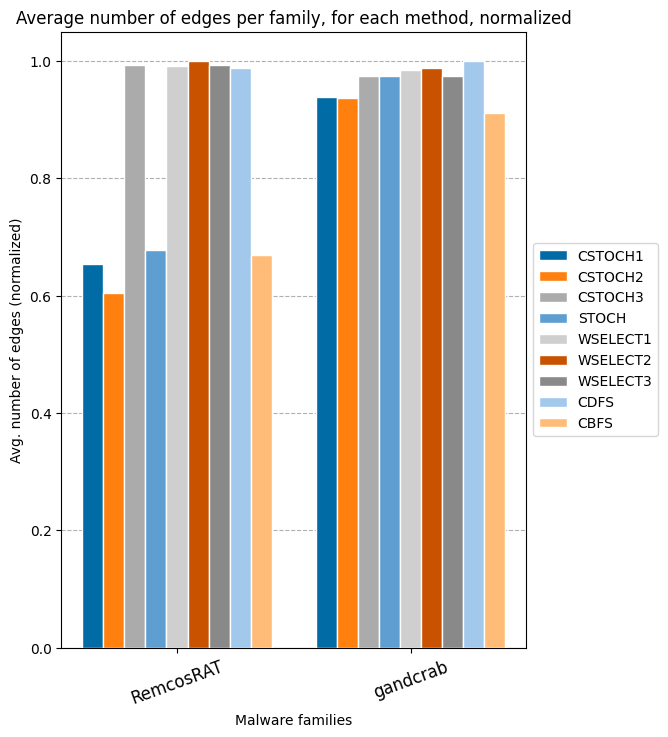

In [43]:
df = pd.DataFrame(data)
print(df)

# famss = [['simbot', 'FeakerStealer', 'RedLineStealer', 'RemcosRAT', 'gandcrab', 'delf'],['bancteian', 'ircbot', 'sillyp2p', 'sytro', 'sfone', 
#         'lamer', 'Sodinokibi']]

famss = [['RemcosRAT', 'gandcrab']]

boom = 1
for fams in famss:
    x = np.arange(len(fams))
    for i in range(1, len(x)):
        x[i] = x[i-1] + 2
    # print(x)


    plt.figure(figsize=(6,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    n1 = [df[f]["CSTOCH1"] for f in fams]
    n2 = [df[f]["CSTOCH2"] for f in fams]
    n3 = [df[f]["CSTOCH3"] for f in fams]
    n4 = [df[f]["STOCH"] for f in fams]
    n5 = [df[f]["WSELECT1"] for f in fams]
    n6 = [df[f]["WSELECT2"] for f in fams]
    n7 = [df[f]["WSELECT3"] for f in fams]
    n8 = [df[f]["CDFS"] for f in fams]
    n9 = [df[f]["CBFS"] for f in fams]

    arr = np.array([np.log(n1), np.log(n2), np.log(n3), np.log(n4), np.log(n5), 
                    np.log(n6), np.log(n7), np.log(n8), np.log(n9)])
    #     print(arr)
    #     print(normailize_all(arr))
    n1, n2, n3, n4, n5, n6, n7, n8, n9 = normailize_all(arr)
    width = 0.18
    #     space = 0.05
    # plot data in grouped manner of bar type
    plt.bar(x-4*(width), n1, width, zorder=3, color="#006BA4", edgecolor='white')
    plt.bar(x-3*(width), n2, width, zorder=3, color="#FF800E", edgecolor='white')
    plt.bar(x-2*(width), n3, width, zorder=3, color="#ABABAB", edgecolor='white')
    plt.bar(x-width, n4, width, zorder=3, color="#5F9ED1", edgecolor='white')
    plt.bar(x, n5, width, zorder=3, color="#CFCFCF", edgecolor='white')
    plt.bar(x+width, n6, width, zorder=3, color="#C85200", edgecolor='white')
    plt.bar(x+2*(width), n7, width, zorder=3, color="#898989", edgecolor='white')
    plt.bar(x+3*(width), n8, width, zorder=3, color="#A2C8EC", edgecolor='white')
    plt.bar(x+4*(width), n9, width, zorder=3, color="#FFBC79", edgecolor='white')
    plt.xticks(x, fams)
    plt.xlabel("Malware families")
    plt.ylabel("Avg. number of edges (normalized)")
    #     plt.legend(methods)
    #     plt.legend(methods, loc='upper center', bbox_to_anchor=(0.5, -0.17),
    #           fancybox=True, shadow=True, ncol=5)
    
    

    plt.legend(methods, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 20, fontsize=12)
    plt.title("Average number of edges per family, for each method, normalized")
    plt.savefig(f"edges_{boom}.png", bbox_inches = 'tight')
    plt.show()
    boom += 1

ircbot
defaultdict(<function <lambda>.<locals>.<lambda> at 0x7fba948b5280>, {'CSTOCH1': 82.65, 'CSTOCH2': 80.6, 'CSTOCH3': 75.25, 'STOCH': 46.3, 'WSELECT1': 38.25, 'WSELECT2': 39.2, 'WSELECT3': 75.25, 'CDFS': 78.2, 'CBFS': 54.0})


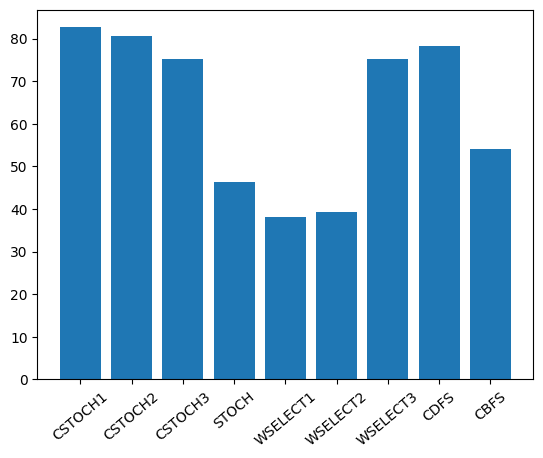

sillyp2p
defaultdict(<function <lambda>.<locals>.<lambda> at 0x7fba948b53a0>, {'CSTOCH1': 25.7, 'CSTOCH2': 27.4, 'CSTOCH3': 648.15, 'STOCH': 59.2, 'WSELECT1': 1166.95, 'WSELECT2': 1365.5, 'WSELECT3': 970.5, 'CDFS': 1275.75, 'CBFS': 14.105263157894736})


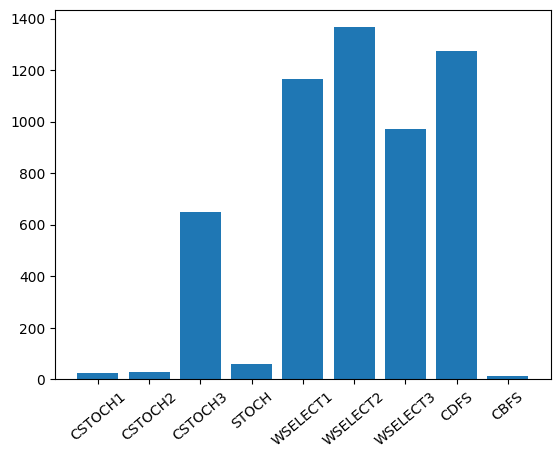

In [20]:
for f in fams:
    print(f)
    print(data[f])
    plt.bar(range(len(data[f])), list(data[f].values()), tick_label=list(data[f].keys()))
    plt.xticks(rotation = 40)
    plt.show()

# Normalize, per methods

In [21]:
# explicit function to normalize array
def normalize(arr, t_min, t_max):
    top = max(arr)
    norm_arr = arr/top
#     if (max(arr)-min(arr)) == 0:
#         print("0000 : ", arr)
#     norm_arr = []
#     diff = t_max - t_min
#     diff_arr = max(arr) - min(arr)
#     for i in arr:
#         temp = (((i - min(arr))*diff)/diff_arr) + t_min
#         norm_arr.append(temp)
    return norm_arr

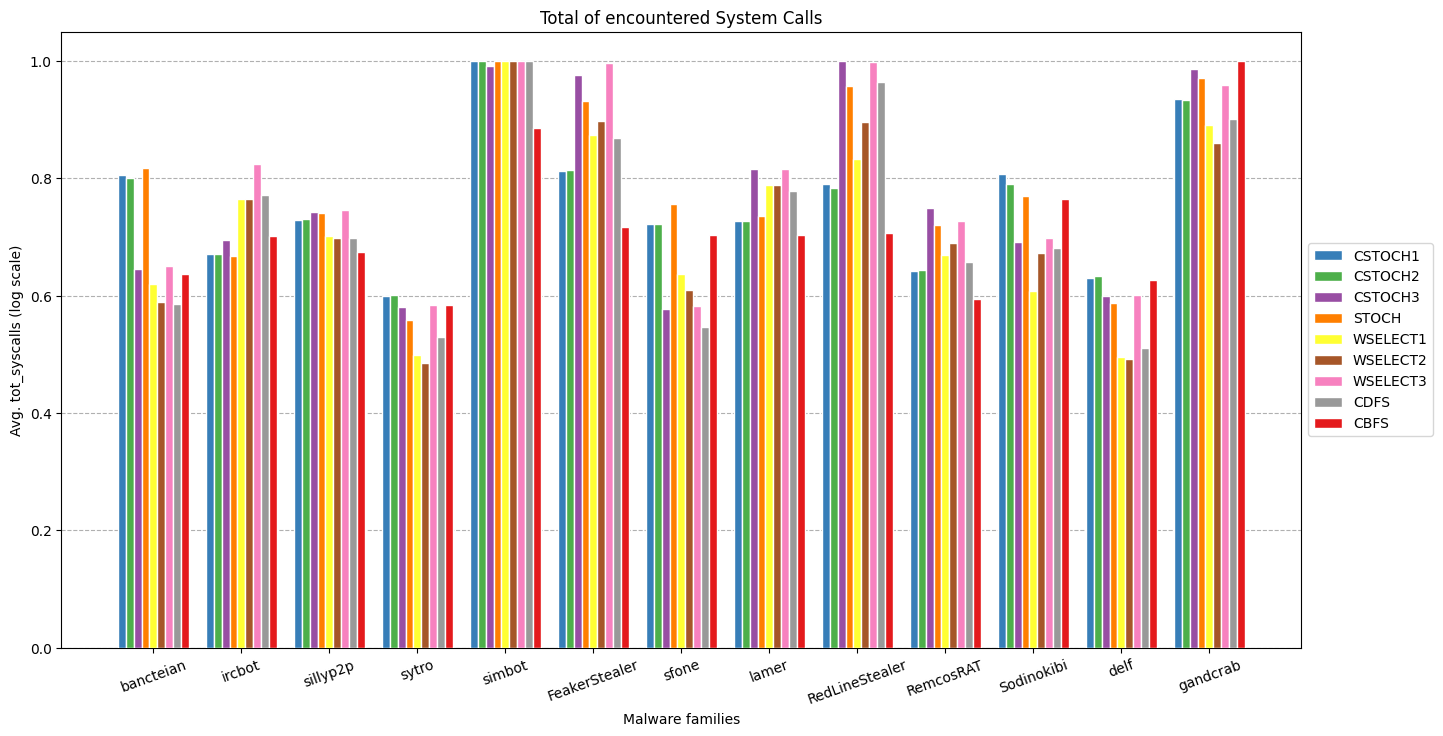

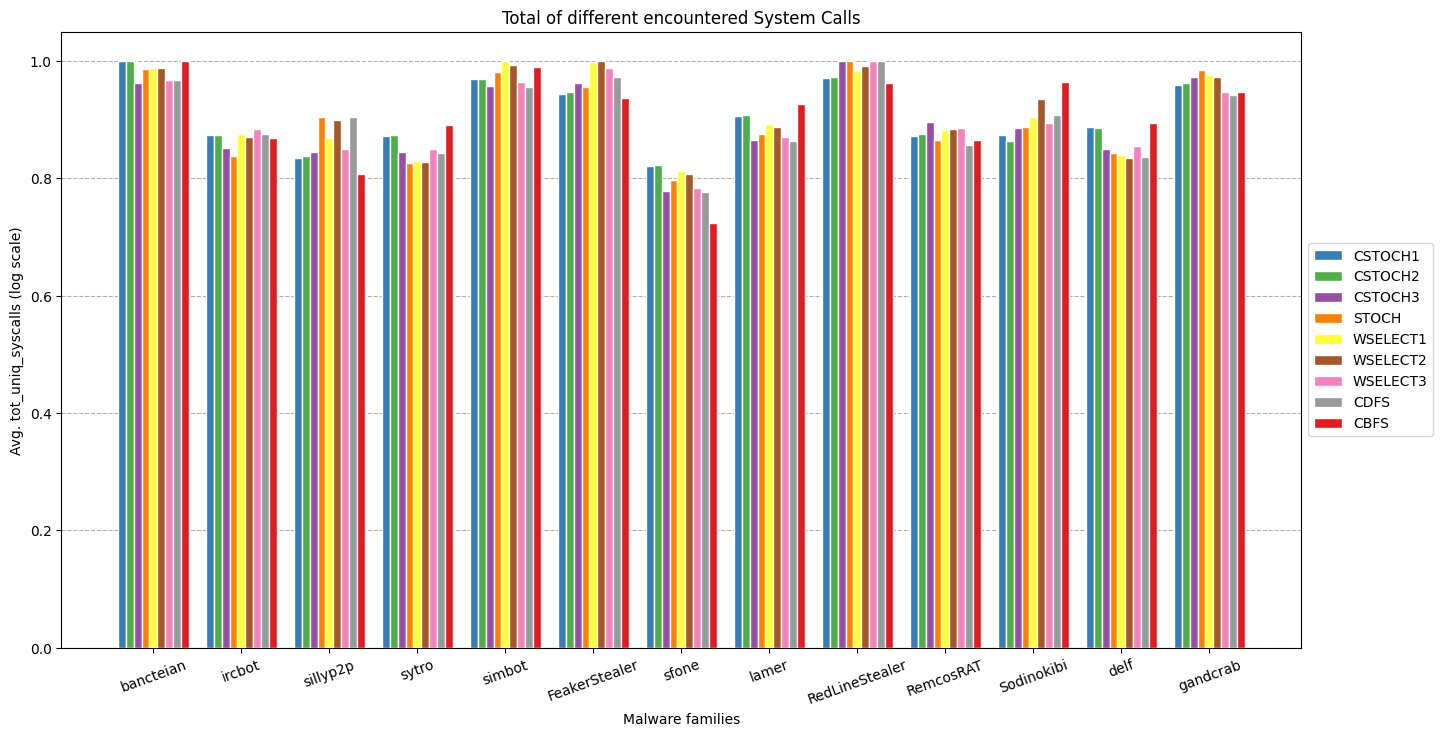

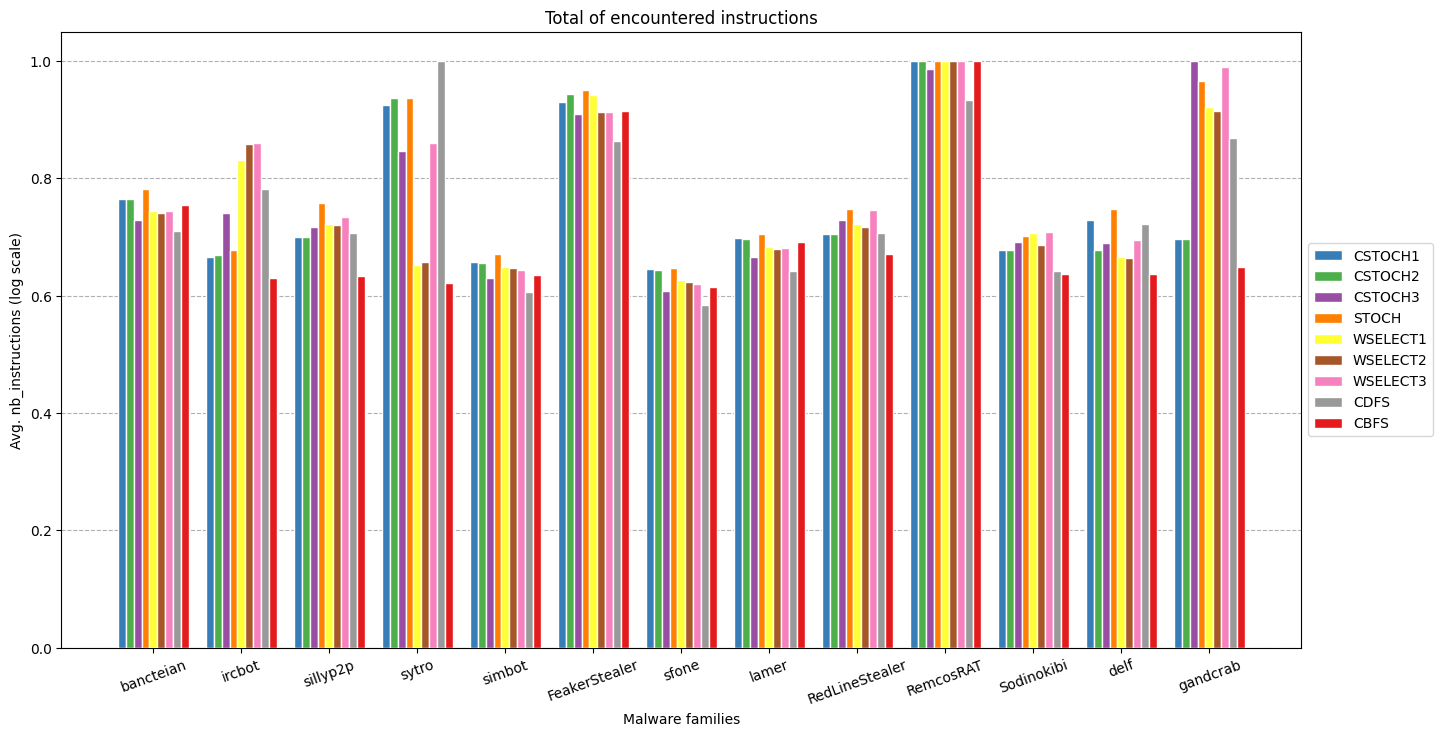

In [22]:
metrics = ["tot_syscalls","tot_uniq_syscalls", "nb_instructions"]

fams = ['bancteian', 'ircbot', 'sillyp2p', 'sytro', 'simbot', 'FeakerStealer', 'sfone',
        'lamer', 'RedLineStealer', 'RemcosRAT', 'Sodinokibi', 'delf', 'gandcrab']
# for f in labels:
# #     vals = df.loc[(df["expl_method"]==m) & (df["family"]==f)]["tot_syscalls"].mean()+
# fam = df.loc[df["family"]==f]

x = np.arange(len(fams))
for i in range(1, len(x)):
    x[i] = x[i-1] + 2
# print(x)

titles = {"tot_syscalls": "Total of encountered System Calls",
          "tot_uniq_syscalls":"Total of different encountered System Calls",
          "nb_instructions":"Total of encountered instructions"}
# df = df_original.loc[df_original["elapsed_time"] <= 800]

df = df_original.loc[((df_original["elapsed_time"] <= 800) & (df_original["elapsed_time"] >= 300))]

for metric in metrics:
    plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    y1 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH1"][metric].mean() for f in fams]
    n1 = normalize(np.log(y1), 1, 2)
#     print(n1)
    y2 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH2"][metric].mean() for f in fams]
    n2 = normalize(np.log(y2), 1, 2)
#     print(n2)
    y3 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH3"][metric].mean() for f in fams]
    n3 = normalize(np.log(y3), 1, 2)
#     print(n3)
    y4 = [df.loc[df["family"]==f].loc[df["expl_method"]=="STOCH"][metric].mean() for f in fams]
    n4 = normalize(np.log(y4), 1, 2)
#     print(n4)
    y5 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT1"][metric].mean() for f in fams]
    n5 = normalize(np.log(y5), 1, 2)
#     print(n5)
    y6 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT2"][metric].mean() for f in fams]
    n6 = normalize(np.log(y6), 1, 2)
#     print(n6)
    y7 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT3"][metric].mean() for f in fams]
    n7 = normalize(np.log(y7), 1, 2)
#     print(n7)
    y8 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CDFS"][metric].mean() for f in fams]
    n8 = normalize(np.log(y8), 1, 2)
#     print(n8)
    y9 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CBFS"][metric].mean() for f in fams]
    n9 = normalize(np.log(y9), 1, 2)
#     print(n9)
    width = 0.18
#     space = 0.05
    # plot data in grouped manner of bar type
    plt.bar(x-4*(width), n1, width, zorder=3, color="#377eb8", edgecolor='white')
    plt.bar(x-3*(width), n2, width, zorder=3, color="#4daf4a", edgecolor='white')
    plt.bar(x-2*(width), n3, width, zorder=3, color="#984ea3", edgecolor='white')
    plt.bar(x-width, n4, width, zorder=3, color="#ff7f00", edgecolor='white')
    plt.bar(x, n5, width, zorder=3, color="#ffff33", edgecolor='white')
    plt.bar(x+width, n6, width, zorder=3, color="#a65628", edgecolor='white')
    plt.bar(x+2*(width), n7, width, zorder=3, color="#f781bf", edgecolor='white')
    plt.bar(x+3*(width), n8, width, zorder=3, color="#999999", edgecolor='white')
    plt.bar(x+4*(width), n9, width, zorder=3, color="#e41a1c", edgecolor='white')
    plt.xticks(x, fams)
    plt.xlabel("Malware families")
    plt.ylabel("Avg. "+ metric + " (log scale)")
#     plt.legend(methods)
#     plt.legend(methods, loc='upper center', bbox_to_anchor=(0.5, -0.17),
#           fancybox=True, shadow=True, ncol=5)

    plt.legend(methods, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 20)
    plt.title(titles[metric])
    plt.savefig(metric+".svg", bbox_inches = 'tight')
    plt.show()
    
    

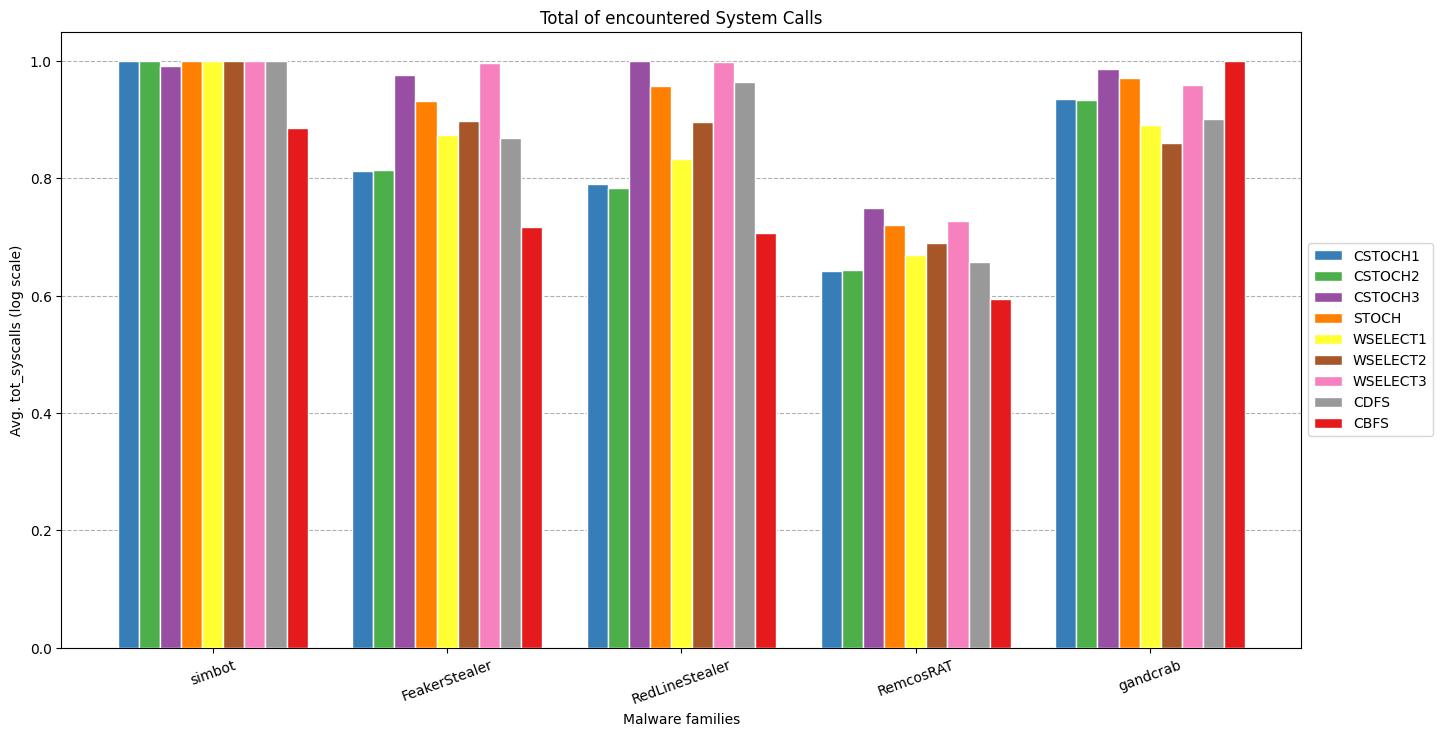

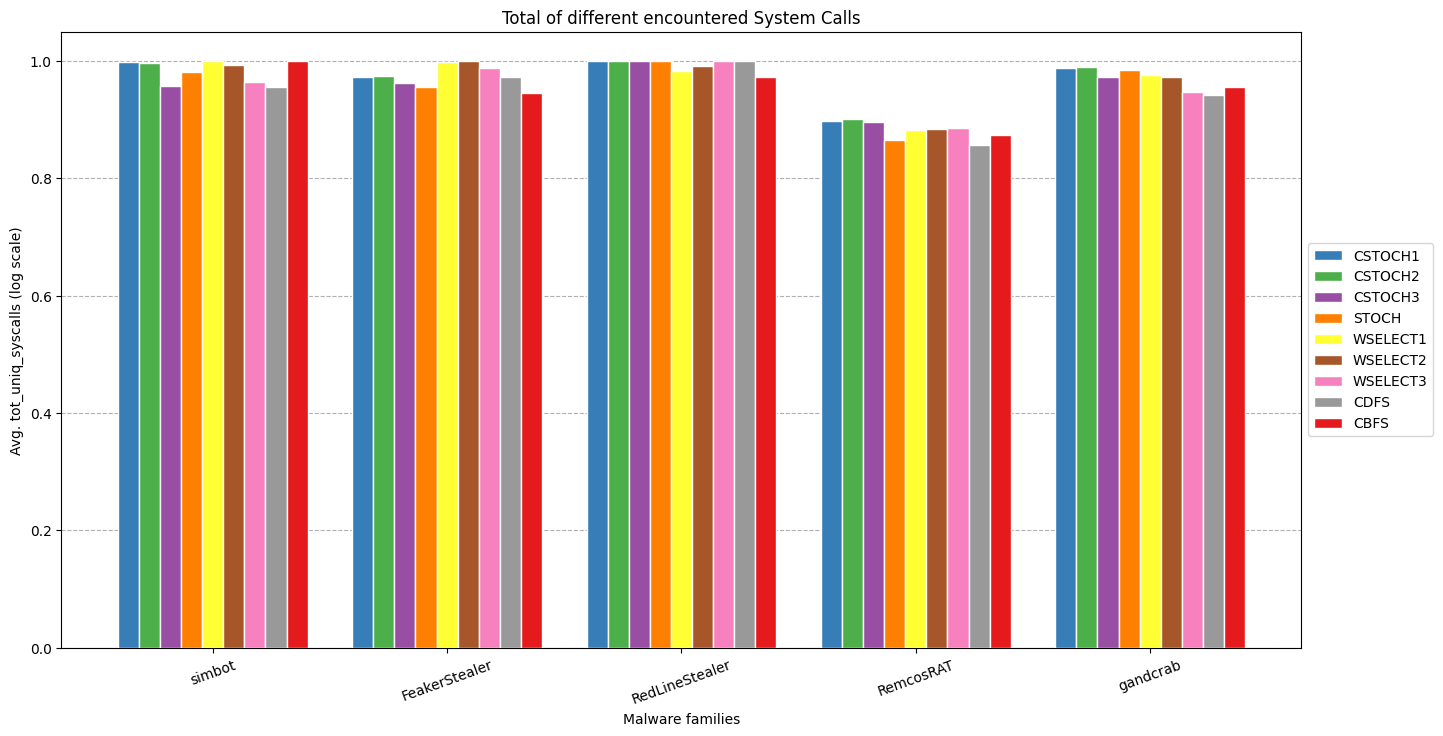

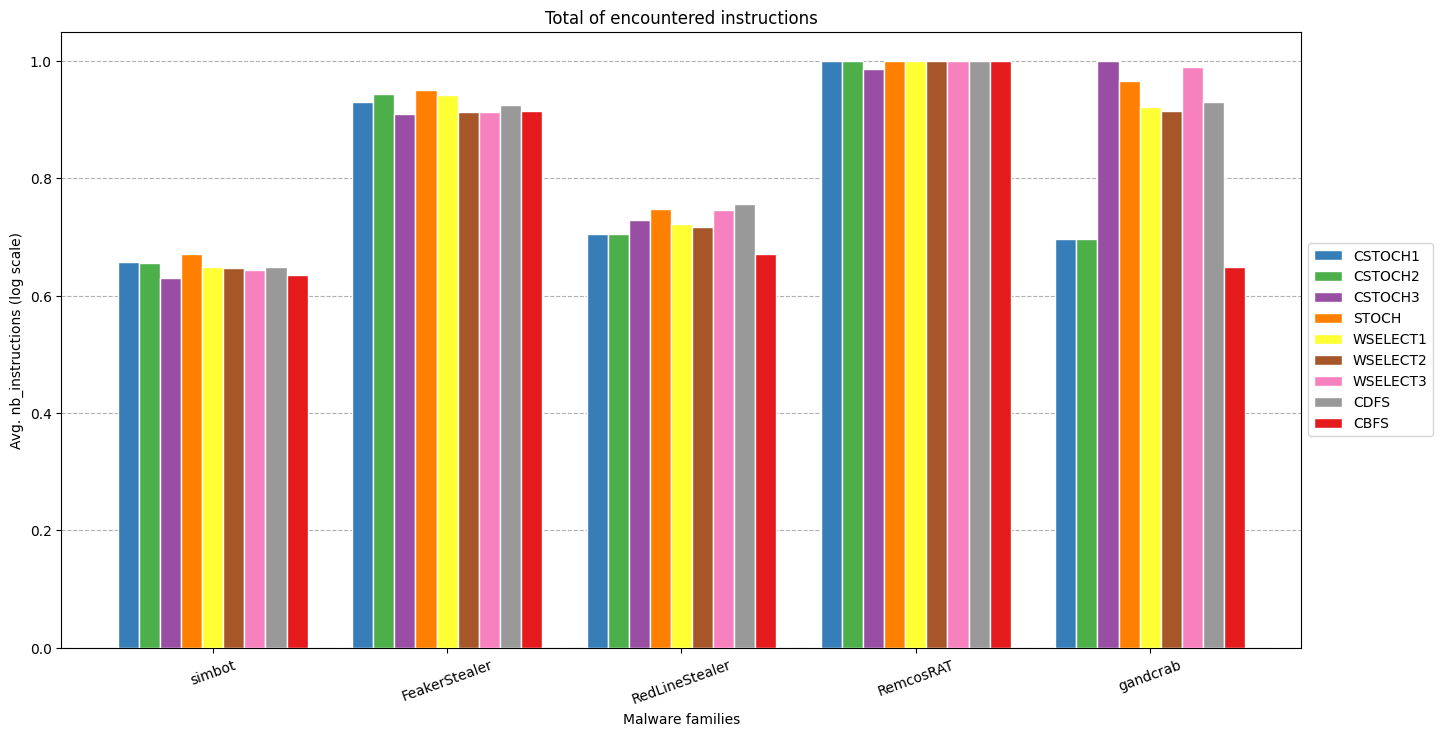

In [23]:
metrics = ["tot_syscalls","tot_uniq_syscalls", "nb_instructions"]

fams = ['simbot', 'FeakerStealer', 'RedLineStealer', 'RemcosRAT', 'gandcrab']
# for f in labels:
# #     vals = df.loc[(df["expl_method"]==m) & (df["family"]==f)]["tot_syscalls"].mean()+
# fam = df.loc[df["family"]==f]

x = np.arange(len(fams))
for i in range(1, len(x)):
    x[i] = x[i-1] + 2
# print(x)

titles = {"tot_syscalls": "Total of encountered System Calls",
          "tot_uniq_syscalls":"Total of different encountered System Calls",
          "nb_instructions":"Total of encountered instructions"}
# df = df_original.loc[df_original["elapsed_time"] <= 800]

df = df_original.loc[((df_original["elapsed_time"] <= 800) & (df_original["elapsed_time"] >= 300))]

for metric in metrics:
    plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    y1 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH1"][metric].mean() for f in fams]
    n1 = normalize(np.log(y1), 1, 2)
#     print(n1)
    y2 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH2"][metric].mean() for f in fams]
    n2 = normalize(np.log(y2), 1, 2)
#     print(n2)
    y3 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH3"][metric].mean() for f in fams]
    n3 = normalize(np.log(y3), 1, 2)
#     print(n3)
    y4 = [df.loc[df["family"]==f].loc[df["expl_method"]=="STOCH"][metric].mean() for f in fams]
    n4 = normalize(np.log(y4), 1, 2)
#     print(n4)
    y5 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT1"][metric].mean() for f in fams]
    n5 = normalize(np.log(y5), 1, 2)
#     print(n5)
    y6 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT2"][metric].mean() for f in fams]
    n6 = normalize(np.log(y6), 1, 2)
#     print(n6)
    y7 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT3"][metric].mean() for f in fams]
    n7 = normalize(np.log(y7), 1, 2)
#     print(n7)
    y8 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CDFS"][metric].mean() for f in fams]
    n8 = normalize(np.log(y8), 1, 2)
#     print(n8)
    y9 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CBFS"][metric].mean() for f in fams]
    n9 = normalize(np.log(y9), 1, 2)
#     print(n9)
    width = 0.18
#     space = 0.05
    # plot data in grouped manner of bar type
    plt.bar(x-4*(width), n1, width, zorder=3, color="#377eb8", edgecolor='white')
    plt.bar(x-3*(width), n2, width, zorder=3, color="#4daf4a", edgecolor='white')
    plt.bar(x-2*(width), n3, width, zorder=3, color="#984ea3", edgecolor='white')
    plt.bar(x-width, n4, width, zorder=3, color="#ff7f00", edgecolor='white')
    plt.bar(x, n5, width, zorder=3, color="#ffff33", edgecolor='white')
    plt.bar(x+width, n6, width, zorder=3, color="#a65628", edgecolor='white')
    plt.bar(x+2*(width), n7, width, zorder=3, color="#f781bf", edgecolor='white')
    plt.bar(x+3*(width), n8, width, zorder=3, color="#999999", edgecolor='white')
    plt.bar(x+4*(width), n9, width, zorder=3, color="#e41a1c", edgecolor='white')
    plt.xticks(x, fams)
    plt.xlabel("Malware families")
    plt.ylabel("Avg. "+ metric + " (log scale)")
#     plt.legend(methods)
#     plt.legend(methods, loc='upper center', bbox_to_anchor=(0.5, -0.17),
#           fancybox=True, shadow=True, ncol=5)

    plt.legend(methods, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 20)
    plt.title(titles[metric])
    plt.savefig(metric+".svg", bbox_inches = 'tight')
    plt.show()
    
    

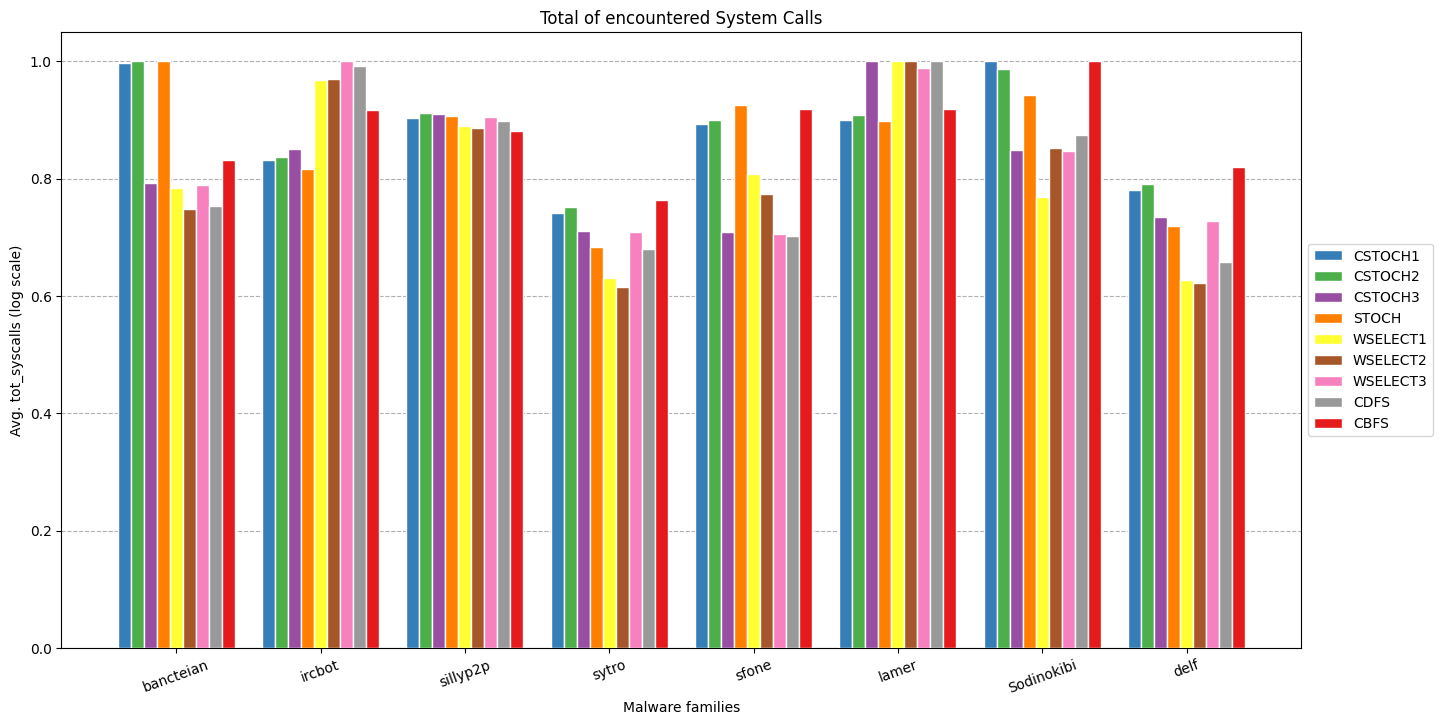

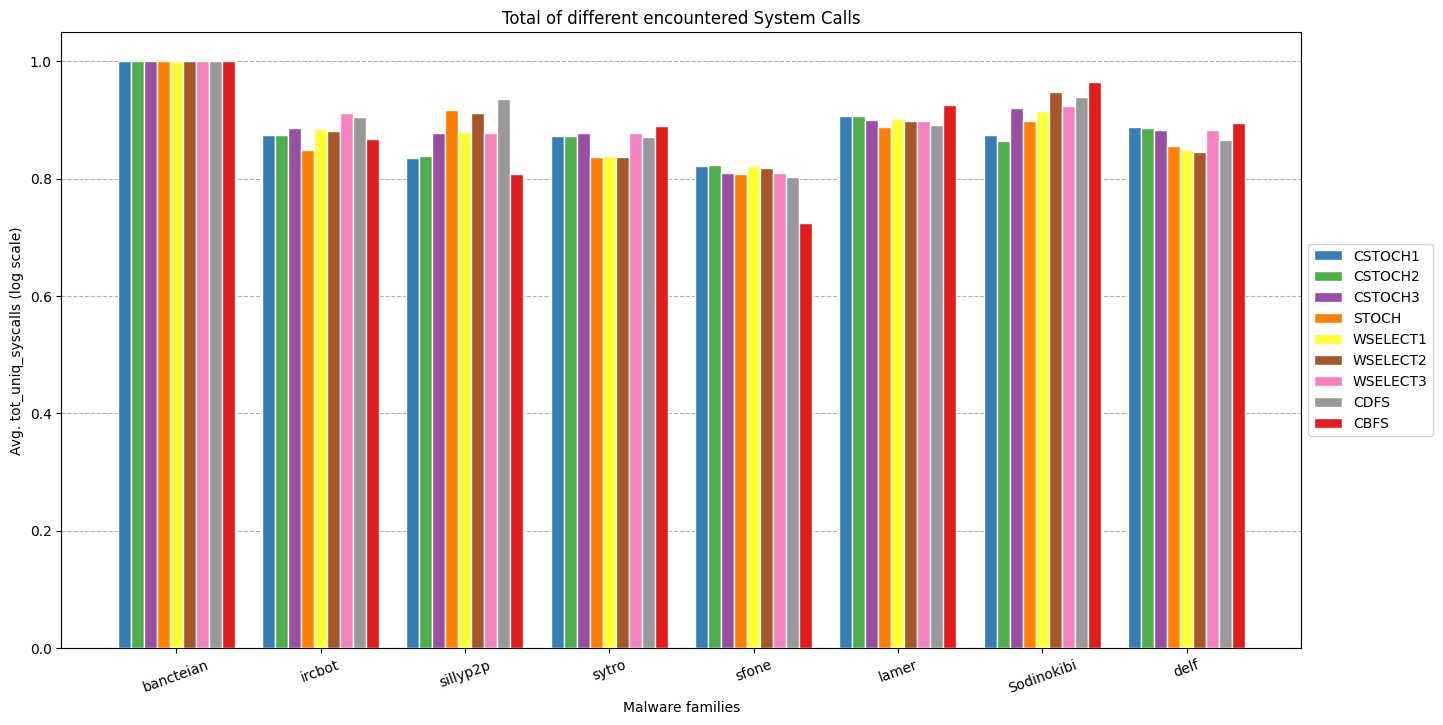

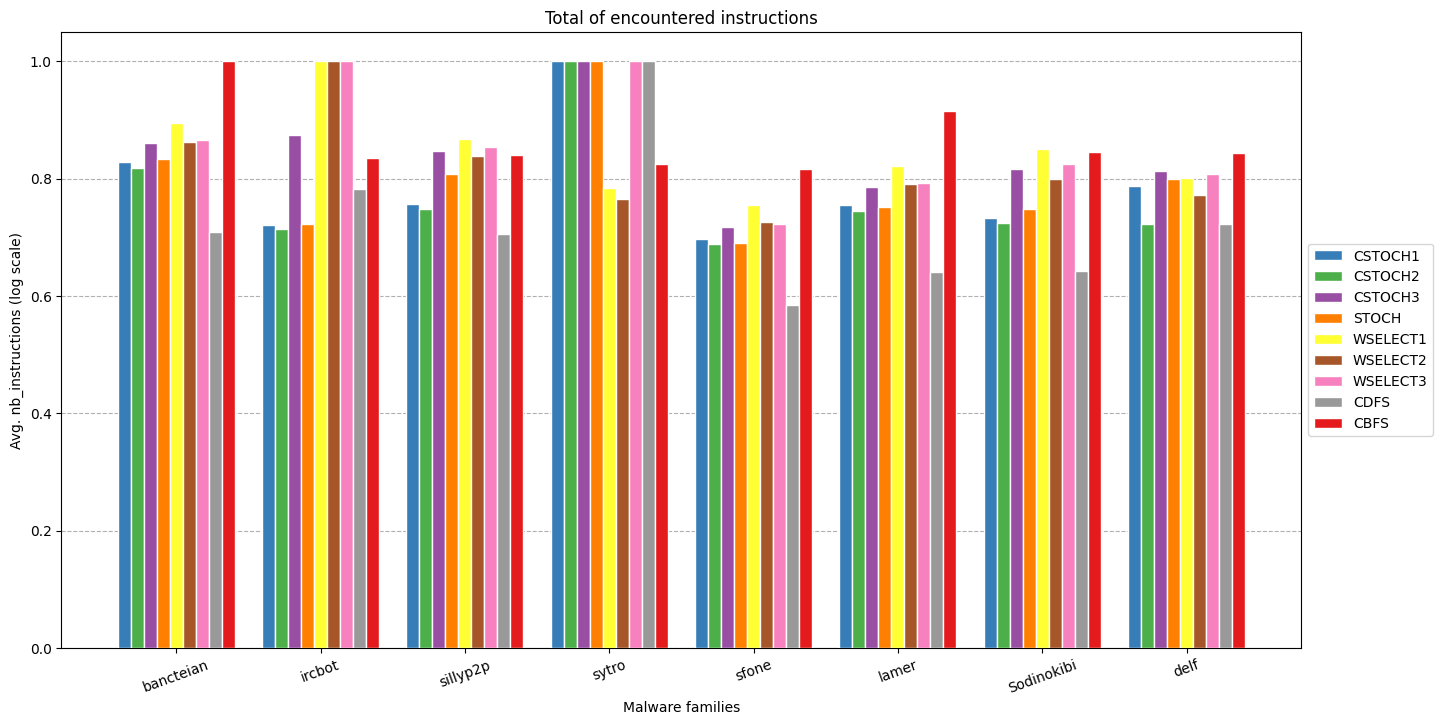

In [24]:
metrics = ["tot_syscalls","tot_uniq_syscalls", "nb_instructions"]

# fams = ['simbot', 'FeakerStealer', 'RedLineStealer', 'RemcosRAT', 'nitol', 'gandcrab']
fams = ['bancteian', 'ircbot', 'sillyp2p', 'sytro', 'sfone', 
        'lamer', 'Sodinokibi', 'delf']
# for f in labels:
# #     vals = df.loc[(df["expl_method"]==m) & (df["family"]==f)]["tot_syscalls"].mean()+
# fam = df.loc[df["family"]==f]

x = np.arange(len(fams))
for i in range(1, len(x)):
    x[i] = x[i-1] + 2
# print(x)

titles = {"tot_syscalls": "Total of encountered System Calls",
          "tot_uniq_syscalls":"Total of different encountered System Calls",
          "nb_instructions":"Total of encountered instructions"}
# df = df_original.loc[df_original["elapsed_time"] <= 800]

df = df_original.loc[((df_original["elapsed_time"] <= 800) & (df_original["elapsed_time"] >= 300))]

for metric in metrics:
    plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    y1 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH1"][metric].mean() for f in fams]
    n1 = normalize(np.log(y1), 1, 2)
#     print(n1)
    y2 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH2"][metric].mean() for f in fams]
    n2 = normalize(np.log(y2), 1, 2)
#     print(n2)
    y3 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH3"][metric].mean() for f in fams]
    n3 = normalize(np.log(y3), 1, 2)
#     print(n3)
    y4 = [df.loc[df["family"]==f].loc[df["expl_method"]=="STOCH"][metric].mean() for f in fams]
    n4 = normalize(np.log(y4), 1, 2)
#     print(n4)
    y5 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT1"][metric].mean() for f in fams]
    n5 = normalize(np.log(y5), 1, 2)
#     print(n5)
    y6 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT2"][metric].mean() for f in fams]
    n6 = normalize(np.log(y6), 1, 2)
#     print(n6)
    y7 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT3"][metric].mean() for f in fams]
    n7 = normalize(np.log(y7), 1, 2)
#     print(n7)
    y8 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CDFS"][metric].mean() for f in fams]
    n8 = normalize(np.log(y8), 1, 2)
#     print(n8)
    y9 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CBFS"][metric].mean() for f in fams]
    n9 = normalize(np.log(y9), 1, 2)
#     print(n9)
    width = 0.18
#     space = 0.05
    # plot data in grouped manner of bar type
    plt.bar(x-4*(width), n1, width, zorder=3, color="#377eb8", edgecolor='white')
    plt.bar(x-3*(width), n2, width, zorder=3, color="#4daf4a", edgecolor='white')
    plt.bar(x-2*(width), n3, width, zorder=3, color="#984ea3", edgecolor='white')
    plt.bar(x-width, n4, width, zorder=3, color="#ff7f00", edgecolor='white')
    plt.bar(x, n5, width, zorder=3, color="#ffff33", edgecolor='white')
    plt.bar(x+width, n6, width, zorder=3, color="#a65628", edgecolor='white')
    plt.bar(x+2*(width), n7, width, zorder=3, color="#f781bf", edgecolor='white')
    plt.bar(x+3*(width), n8, width, zorder=3, color="#999999", edgecolor='white')
    plt.bar(x+4*(width), n9, width, zorder=3, color="#e41a1c", edgecolor='white')
    plt.xticks(x, fams)
    plt.xlabel("Malware families")
    plt.ylabel("Avg. "+ metric + " (log scale)")
#     plt.legend(methods)
#     plt.legend(methods, loc='upper center', bbox_to_anchor=(0.5, -0.17),
#           fancybox=True, shadow=True, ncol=5)

    plt.legend(methods, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 20)
    plt.title(titles[metric])
    plt.savefig(metric+".svg", bbox_inches = 'tight')
    plt.show()
    
    

# Normalize, per family

In [25]:
def normailize_all(arrays):
    for i in range(len(arrays[0])):
        v = arrays[:, i]
        arrays[:, i] = v / v.max()
    return arrays

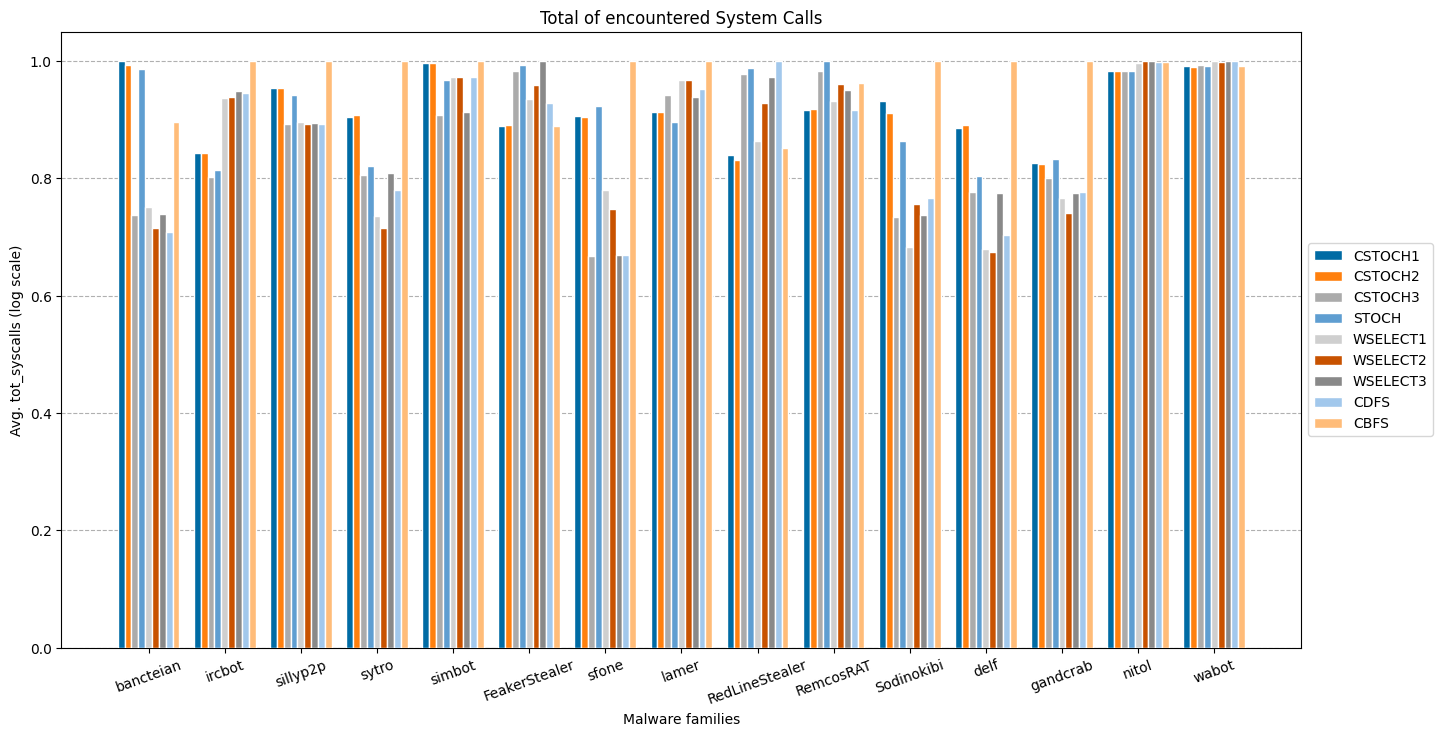

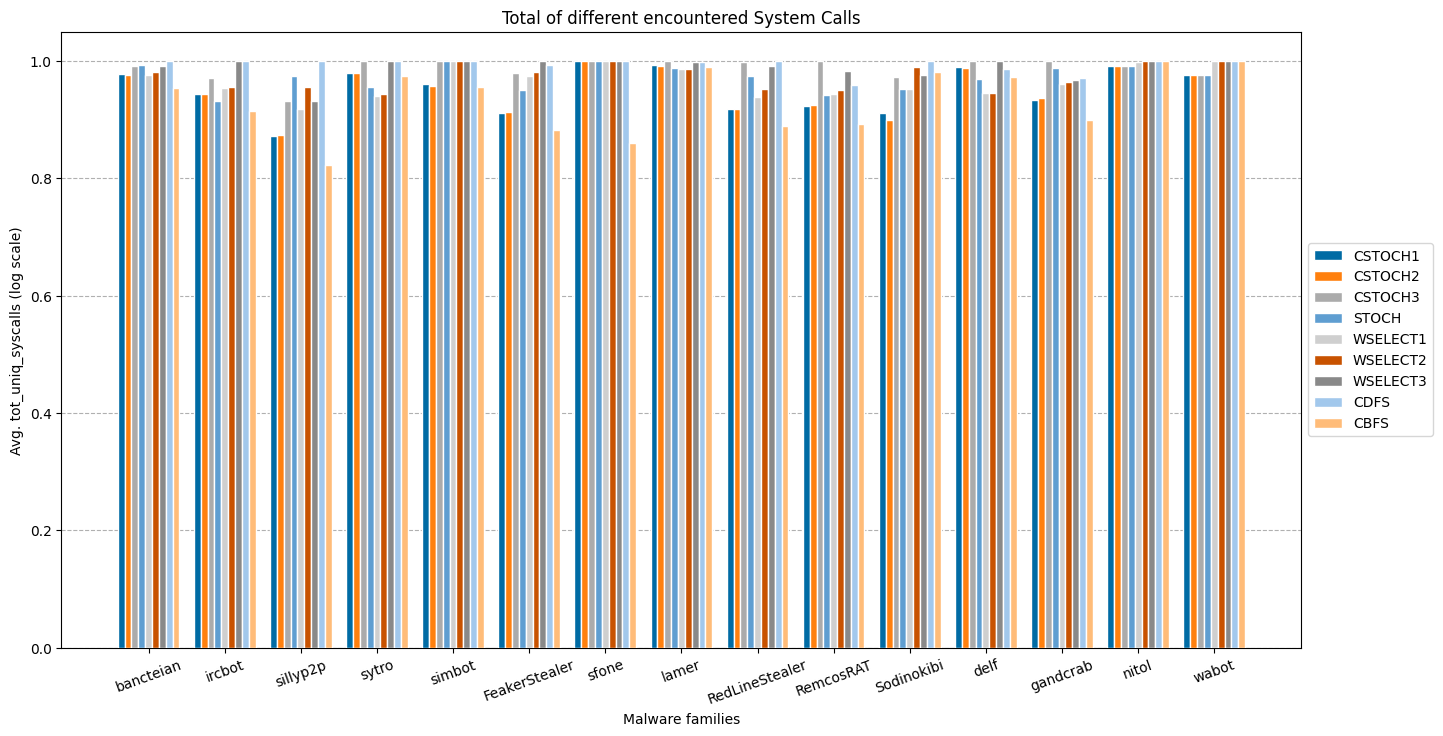

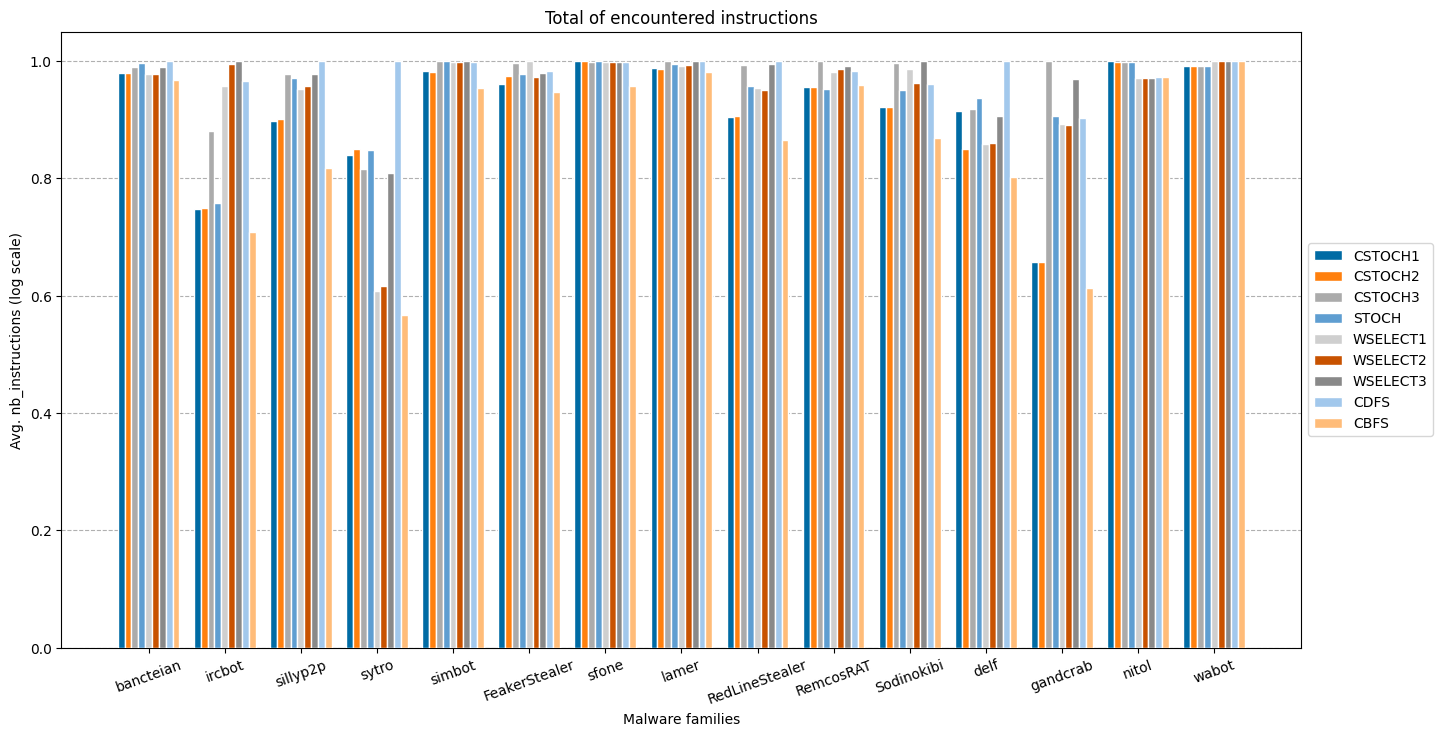

In [26]:
metrics = ["tot_syscalls","tot_uniq_syscalls", "nb_instructions"]

fams = ['bancteian', 'ircbot', 'sillyp2p', 'sytro', 'simbot', 'FeakerStealer', 'sfone',
        'lamer', 'RedLineStealer', 'RemcosRAT', 'Sodinokibi', 'delf', 'gandcrab', 'nitol', 'wabot']
# for f in labels:
# #     vals = df.loc[(df["expl_method"]==m) & (df["family"]==f)]["tot_syscalls"].mean()+
# fam = df.loc[df["family"]==f]

x = np.arange(len(fams))
for i in range(1, len(x)):
    x[i] = x[i-1] + 2
# print(x)

titles = {"tot_syscalls": "Total of encountered System Calls",
          "tot_uniq_syscalls":"Total of different encountered System Calls",
          "nb_instructions":"Total of encountered instructions"}
# df = df_original.loc[df_original["elapsed_time"] <= 800]

df = df_original.loc[((df_original["elapsed_time"] <= 800) & (df_original["elapsed_time"] >= 300))]

for metric in metrics:
    plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    n1 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH1"][metric].mean() for f in fams]
    n2 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH2"][metric].mean() for f in fams]
    n3 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH3"][metric].mean() for f in fams]
    n4 = [df.loc[df["family"]==f].loc[df["expl_method"]=="STOCH"][metric].mean() for f in fams]
    n5 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT1"][metric].mean() for f in fams]
    n6 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT2"][metric].mean() for f in fams]
    n7 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT3"][metric].mean() for f in fams]
    n8 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CDFS"][metric].mean() for f in fams]
    n9 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CBFS"][metric].mean() for f in fams]

    arr = np.array([np.log(n1), np.log(n2), np.log(n3), np.log(n4), np.log(n5), 
                    np.log(n6), np.log(n7), np.log(n8), np.log(n9)])
#     print(arr)
#     print(normailize_all(arr))
    n1, n2, n3, n4, n5, n6, n7, n8, n9 = normailize_all(arr)
    width = 0.18
#     space = 0.05
    # plot data in grouped manner of bar type
    plt.bar(x-4*(width), n1, width, zorder=3, color="#006BA4", edgecolor='white')
    plt.bar(x-3*(width), n2, width, zorder=3, color="#FF800E", edgecolor='white')
    plt.bar(x-2*(width), n3, width, zorder=3, color="#ABABAB", edgecolor='white')
    plt.bar(x-width, n4, width, zorder=3, color="#5F9ED1", edgecolor='white')
    plt.bar(x, n5, width, zorder=3, color="#CFCFCF", edgecolor='white')
    plt.bar(x+width, n6, width, zorder=3, color="#C85200", edgecolor='white')
    plt.bar(x+2*(width), n7, width, zorder=3, color="#898989", edgecolor='white')
    plt.bar(x+3*(width), n8, width, zorder=3, color="#A2C8EC", edgecolor='white')
    plt.bar(x+4*(width), n9, width, zorder=3, color="#FFBC79", edgecolor='white')
    plt.xticks(x, fams)
    plt.xlabel("Malware families")
    plt.ylabel("Avg. "+ metric + " (log scale)")
#     plt.legend(methods)
#     plt.legend(methods, loc='upper center', bbox_to_anchor=(0.5, -0.17),
#           fancybox=True, shadow=True, ncol=5)

    plt.legend(methods, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 20)
    plt.title(titles[metric])
    plt.savefig(metric+".svg", bbox_inches = 'tight')
    plt.show()
    
    

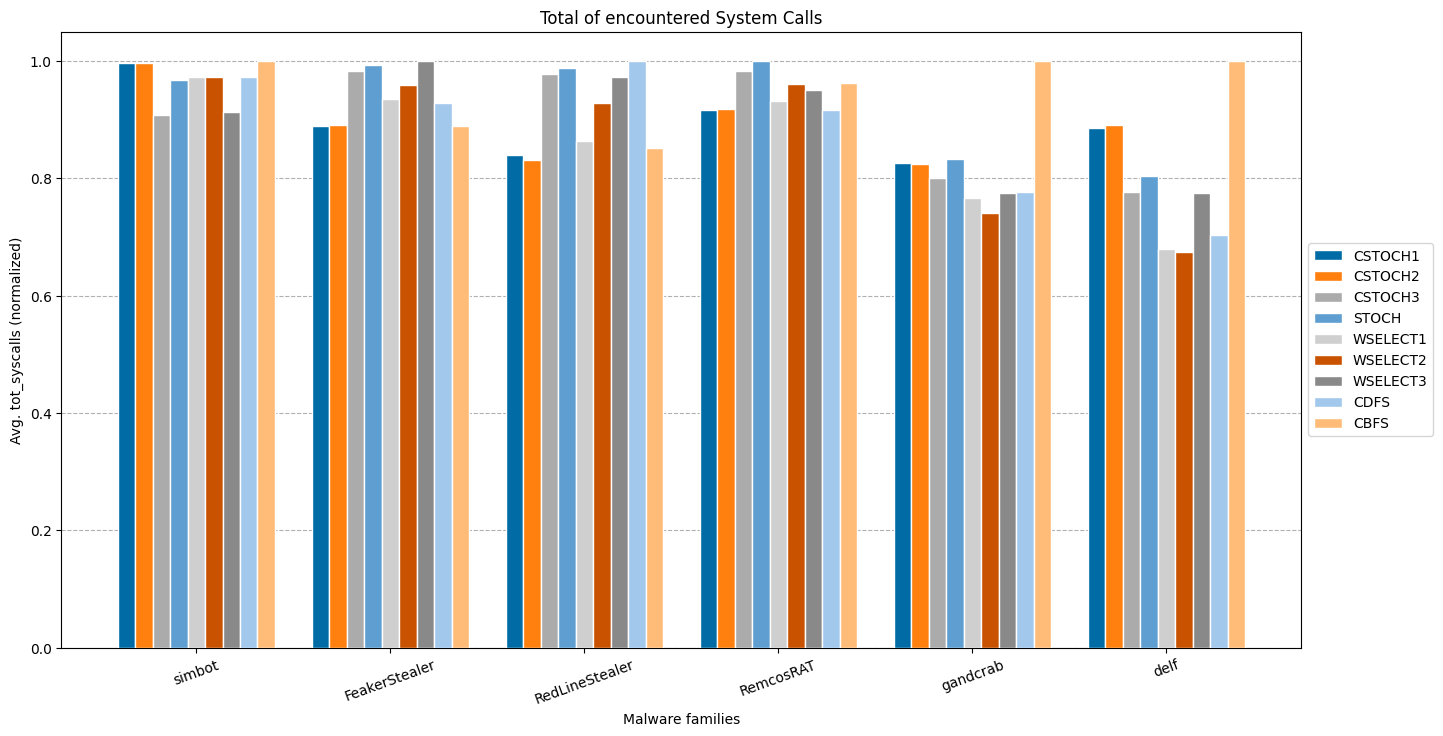

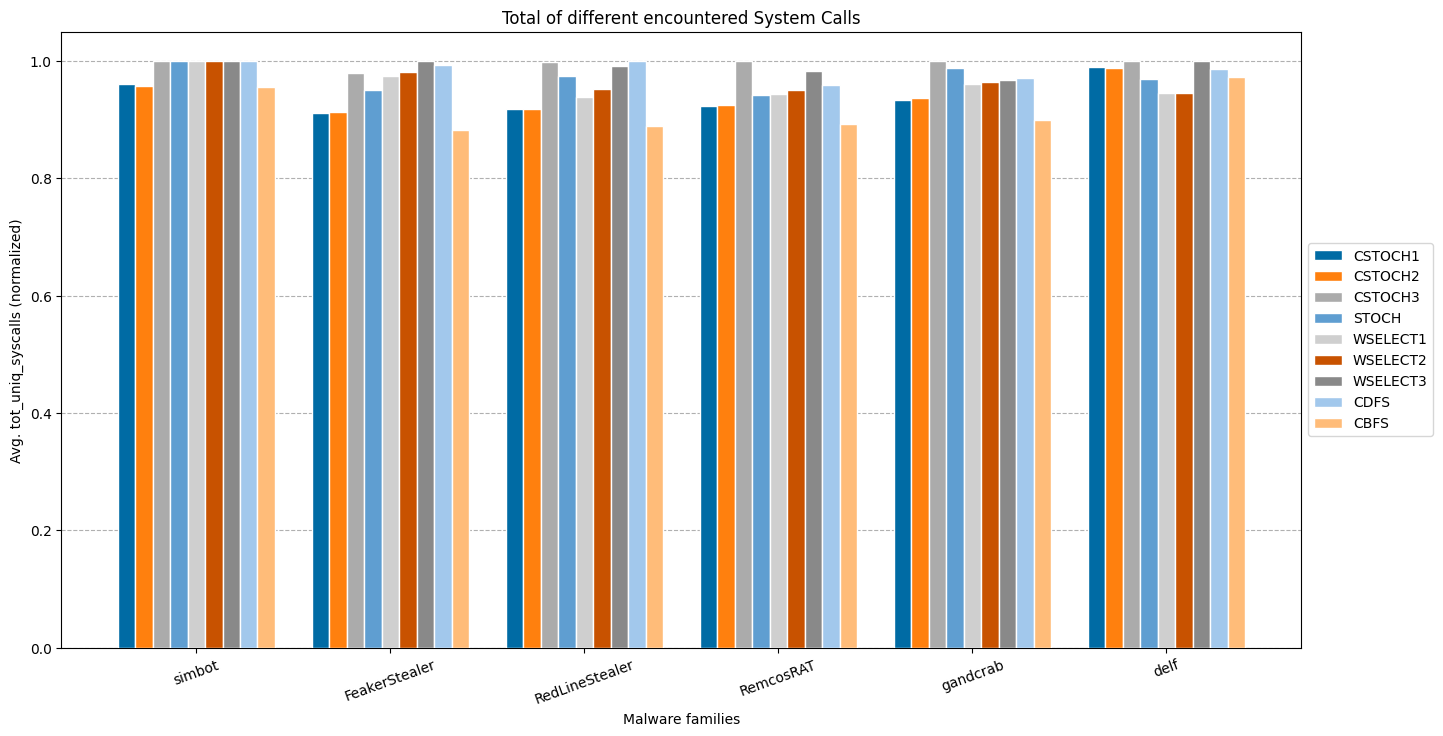

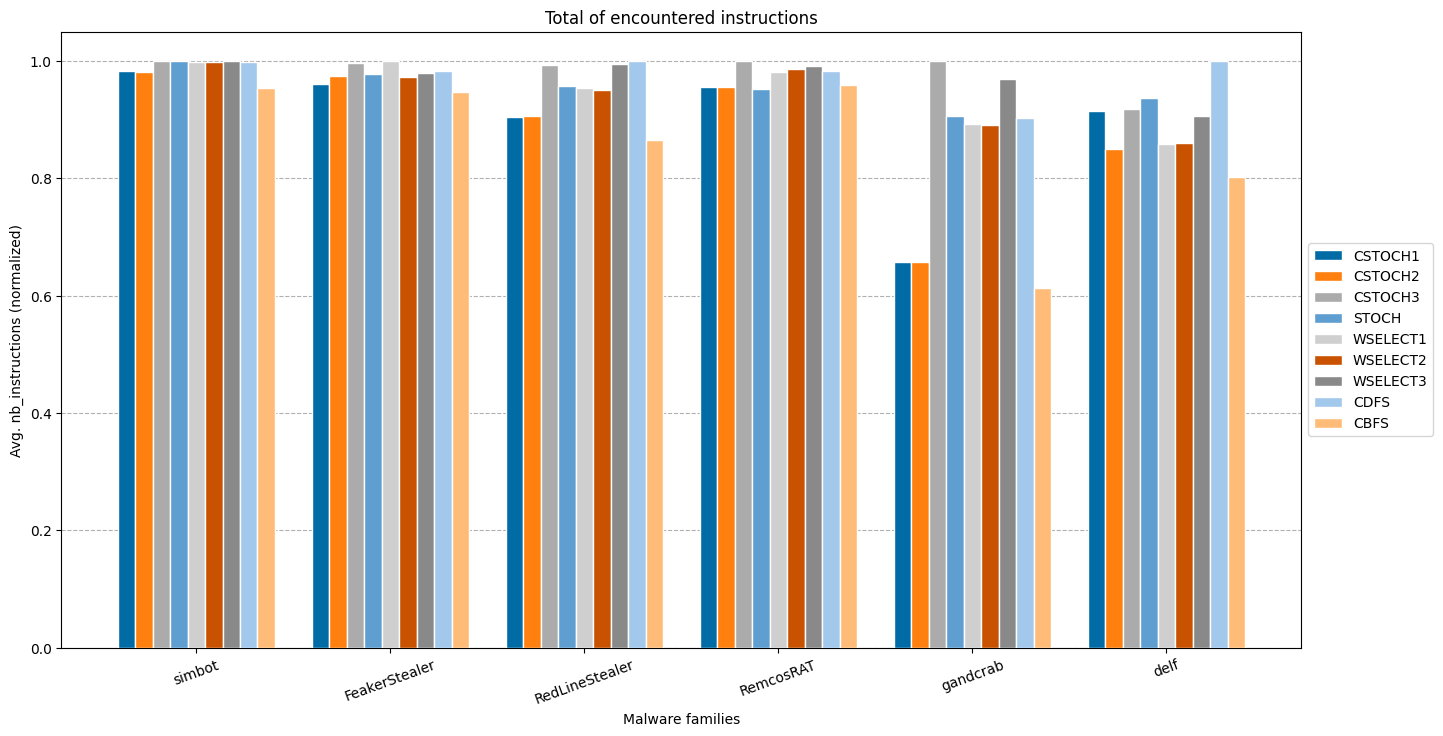

In [27]:
metrics = ["tot_syscalls","tot_uniq_syscalls", "nb_instructions"]

fams = ['simbot', 'FeakerStealer', 'RedLineStealer', 'RemcosRAT', 'gandcrab', 'delf']#, 'nitol', 'wabot']
# for f in labels:
# #     vals = df.loc[(df["expl_method"]==m) & (df["family"]==f)]["tot_syscalls"].mean()+
# fam = df.loc[df["family"]==f]

x = np.arange(len(fams))
for i in range(1, len(x)):
    x[i] = x[i-1] + 2
# print(x)

titles = {"tot_syscalls": "Total of encountered System Calls",
          "tot_uniq_syscalls":"Total of different encountered System Calls",
          "nb_instructions":"Total of encountered instructions"}
# df = df_original.loc[df_original["elapsed_time"] <= 800]

df = df_original.loc[((df_original["elapsed_time"] <= 800) & (df_original["elapsed_time"] >= 300))]

for metric in metrics:
    plt.figure(figsize=(16,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    n1 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH1"][metric].mean() for f in fams]
    n2 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH2"][metric].mean() for f in fams]
    n3 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH3"][metric].mean() for f in fams]
    n4 = [df.loc[df["family"]==f].loc[df["expl_method"]=="STOCH"][metric].mean() for f in fams]
    n5 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT1"][metric].mean() for f in fams]
    n6 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT2"][metric].mean() for f in fams]
    n7 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT3"][metric].mean() for f in fams]
    n8 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CDFS"][metric].mean() for f in fams]
    n9 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CBFS"][metric].mean() for f in fams]

    arr = np.array([np.log(n1), np.log(n2), np.log(n3), np.log(n4), np.log(n5), 
                    np.log(n6), np.log(n7), np.log(n8), np.log(n9)])
#     print(arr)
#     print(normailize_all(arr))
    n1, n2, n3, n4, n5, n6, n7, n8, n9 = normailize_all(arr)
    width = 0.18
#     space = 0.05
    # plot data in grouped manner of bar type
    plt.bar(x-4*(width), n1, width, zorder=3, color="#006BA4", edgecolor='white')
    plt.bar(x-3*(width), n2, width, zorder=3, color="#FF800E", edgecolor='white')
    plt.bar(x-2*(width), n3, width, zorder=3, color="#ABABAB", edgecolor='white')
    plt.bar(x-width, n4, width, zorder=3, color="#5F9ED1", edgecolor='white')
    plt.bar(x, n5, width, zorder=3, color="#CFCFCF", edgecolor='white')
    plt.bar(x+width, n6, width, zorder=3, color="#C85200", edgecolor='white')
    plt.bar(x+2*(width), n7, width, zorder=3, color="#898989", edgecolor='white')
    plt.bar(x+3*(width), n8, width, zorder=3, color="#A2C8EC", edgecolor='white')
    plt.bar(x+4*(width), n9, width, zorder=3, color="#FFBC79", edgecolor='white')
    plt.xticks(x, fams)
    plt.xlabel("Malware families")
    plt.ylabel("Avg. "+ metric + " (normalized)")
#     plt.legend(methods)
#     plt.legend(methods, loc='upper center', bbox_to_anchor=(0.5, -0.17),
#           fancybox=True, shadow=True, ncol=5)

    plt.legend(methods, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 20)
    plt.title(titles[metric])
    plt.savefig(metric+"1.png", bbox_inches = 'tight')
    plt.show()
    
    

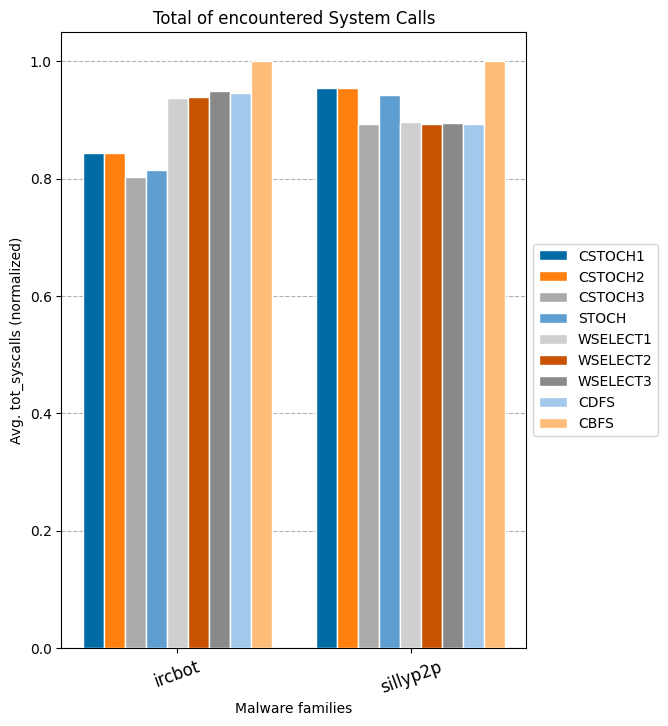

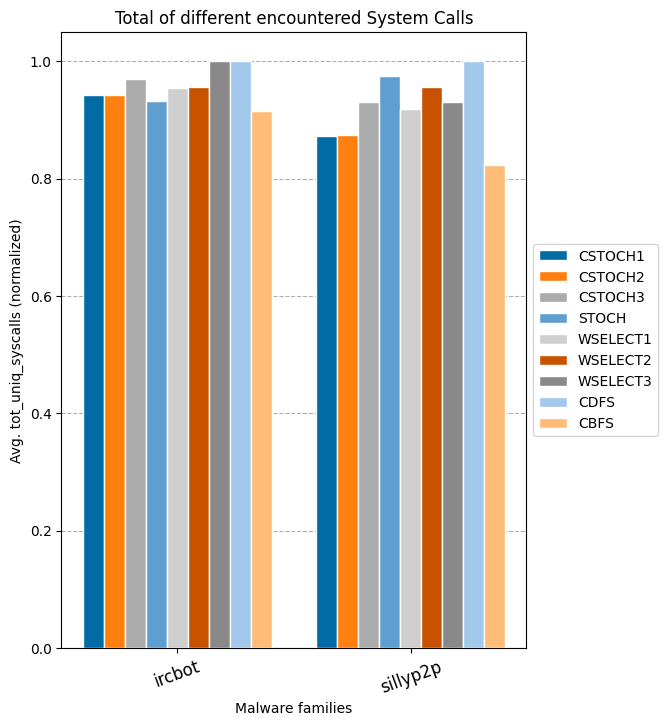

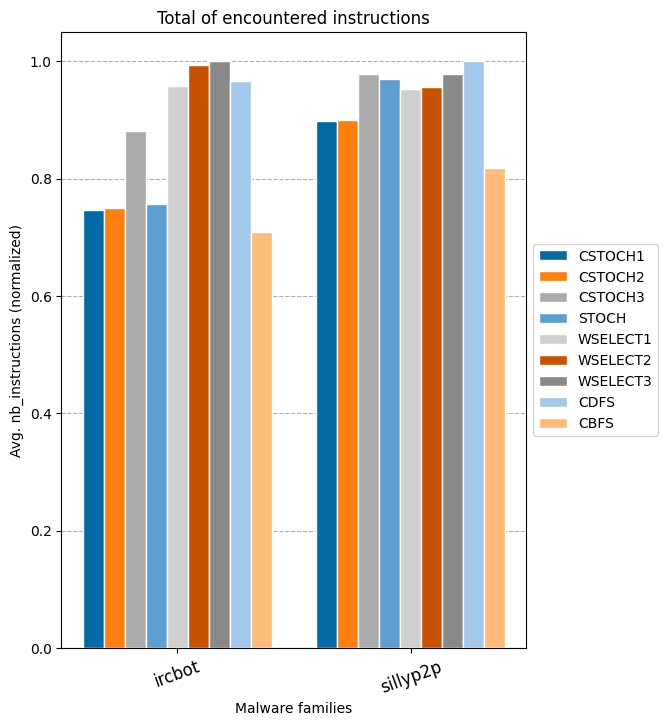

In [40]:
metrics = ["tot_syscalls","tot_uniq_syscalls", "nb_instructions"]

# fams = ['bancteian', 'ircbot', 'sillyp2p', 'sytro', 'sfone', 
#         'lamer', 'Sodinokibi']
fams = ['ircbot', 'sillyp2p']
# for f in labels:
# #     vals = df.loc[(df["expl_method"]==m) & (df["family"]==f)]["tot_syscalls"].mean()+
# fam = df.loc[df["family"]==f]

x = np.arange(len(fams))
for i in range(1, len(x)):
    x[i] = x[i-1] + 2
# print(x)

titles = {"tot_syscalls": "Total of encountered System Calls",
          "tot_uniq_syscalls":"Total of different encountered System Calls",
          "nb_instructions":"Total of encountered instructions"}
# df = df_original.loc[df_original["elapsed_time"] <= 800]

df = df_original.loc[((df_original["elapsed_time"] <= 800) & (df_original["elapsed_time"] >= 300))]

for metric in metrics:
    plt.figure(figsize=(6,8))
    plt.grid(axis='y', linestyle="dashed", zorder=0)
    n1 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH1"][metric].mean() for f in fams]
    n2 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH2"][metric].mean() for f in fams]
    n3 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CSTOCH3"][metric].mean() for f in fams]
    n4 = [df.loc[df["family"]==f].loc[df["expl_method"]=="STOCH"][metric].mean() for f in fams]
    n5 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT1"][metric].mean() for f in fams]
    n6 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT2"][metric].mean() for f in fams]
    n7 = [df.loc[df["family"]==f].loc[df["expl_method"]=="WSELECT3"][metric].mean() for f in fams]
    n8 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CDFS"][metric].mean() for f in fams]
    n9 = [df.loc[df["family"]==f].loc[df["expl_method"]=="CBFS"][metric].mean() for f in fams]

    arr = np.array([np.log(n1), np.log(n2), np.log(n3), np.log(n4), np.log(n5), 
                    np.log(n6), np.log(n7), np.log(n8), np.log(n9)])
#     print(arr)
#     print(normailize_all(arr))
    n1, n2, n3, n4, n5, n6, n7, n8, n9 = normailize_all(arr)
    width = 0.18
#     space = 0.05
    # plot data in grouped manner of bar type
    plt.bar(x-4*(width), n1, width, zorder=3, color="#006BA4", edgecolor='white')
    plt.bar(x-3*(width), n2, width, zorder=3, color="#FF800E", edgecolor='white')
    plt.bar(x-2*(width), n3, width, zorder=3, color="#ABABAB", edgecolor='white')
    plt.bar(x-width, n4, width, zorder=3, color="#5F9ED1", edgecolor='white')
    plt.bar(x, n5, width, zorder=3, color="#CFCFCF", edgecolor='white')
    plt.bar(x+width, n6, width, zorder=3, color="#C85200", edgecolor='white')
    plt.bar(x+2*(width), n7, width, zorder=3, color="#898989", edgecolor='white')
    plt.bar(x+3*(width), n8, width, zorder=3, color="#A2C8EC", edgecolor='white')
    plt.bar(x+4*(width), n9, width, zorder=3, color="#FFBC79", edgecolor='white')
    plt.xticks(x, fams)
    plt.xlabel("Malware families")
    plt.ylabel("Avg. "+ metric + " (normalized)")
#     plt.legend(methods)
#     plt.legend(methods, loc='upper center', bbox_to_anchor=(0.5, -0.17),
#           fancybox=True, shadow=True, ncol=5)

    plt.legend(methods, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 20, fontsize=12)
    plt.title(titles[metric])
    plt.savefig(metric+"2.png", bbox_inches = 'tight')
    plt.show()   

# Randomness impact

In [29]:
labels = ['bancteian', 'ircbot', 'sillyp2p', 'sytro', 'simbot', 'FeakerStealer', 'sfone', 
          'lamer', 'RedLineStealer', 'RemcosRAT', 'Sodinokibi', 'delf', 'gandcrab', 'wabot', 'mirai']

randmethods= ['CSTOCH1', 'CSTOCH2', 'CSTOCH3', 'STOCH']

df_original = pd.read_csv('./src/output/eval_SCDG_n/measurements.csv')
print(df_original)

       iter expl_method     family  \
0         0     CSTOCH1  bancteian   
1         0     CSTOCH2  bancteian   
2         0     CSTOCH3  bancteian   
3         0       STOCH  bancteian   
4         0    WSELECT1  bancteian   
...     ...         ...        ...   
11227     7    WSELECT2      sfone   
11228     7    WSELECT3      sfone   
11229     7        CDFS      sfone   
11230     7        CBFS      sfone   
11231     7     CSTOCH1  RemcosRAT   

                                           nameFileShort  tot_syscalls  \
0                       00013b0490c8d79ad771da5d99544dc2          2377   
1                       00013b0490c8d79ad771da5d99544dc2          2398   
2                       00013b0490c8d79ad771da5d99544dc2           297   
3                       00013b0490c8d79ad771da5d99544dc2          2265   
4                       00013b0490c8d79ad771da5d99544dc2           323   
...                                                  ...           ...   
11227                   0

In [30]:
df = df_original.loc[((df_original["elapsed_time"] <= 800) & (df_original["elapsed_time"] >= 300))]

# clean_df = df.loc[df_original["iter"]!= 1].loc[df["iter"]!= 6].loc[df["expl_method"].isin(randmethods)]
clean_df = df.loc[df_original["iter"]!= 1].loc[df["expl_method"].isin(randmethods)]

print(clean_df)

       iter expl_method     family  \
0         0     CSTOCH1  bancteian   
1         0     CSTOCH2  bancteian   
2         0     CSTOCH3  bancteian   
3         0       STOCH  bancteian   
9         0     CSTOCH1  bancteian   
...     ...         ...        ...   
11222     7     CSTOCH1      sfone   
11223     7     CSTOCH2      sfone   
11224     7     CSTOCH3      sfone   
11225     7       STOCH      sfone   
11231     7     CSTOCH1  RemcosRAT   

                                           nameFileShort  tot_syscalls  \
0                       00013b0490c8d79ad771da5d99544dc2          2377   
1                       00013b0490c8d79ad771da5d99544dc2          2398   
2                       00013b0490c8d79ad771da5d99544dc2           297   
3                       00013b0490c8d79ad771da5d99544dc2          2265   
9                       0002253a5beb9d462a311149d3b439fc          1790   
...                                                  ...           ...   
11222                   0

In [31]:
# metrics = ["tot_syscalls","tot_uniq_syscalls", "nb_instructions"]

# for m in metrics:
#     # calculate the average 'tot_syscalls' for each iteration and family
#     avg_by_iter_family = clean_df.groupby(['iter', 'family'])[m].mean()
# #     print(avg_by_iter_family)
# #     print("###############")

#     # calculate the standard deviation of the average 'tot_syscalls' for each family
#     std_by_family = avg_by_iter_family.groupby('family').std()
# #     print(std_by_family)
# #     print("###############")
# #     fig, ax = plt.subplots()
# #     ax.set_yscale('log')
#     # create a bar plot of the standard deviation by family
#     std_by_family.plot(kind='bar')

#     # add labels and title to the plot
#     plt.xlabel('Family')
#     plt.ylabel(f'Standard Deviation of Avg {m}')
#     plt.title(f'Standard Deviation of Avg {m} by Family')

#     # display the plot
#     plt.show()

In [32]:
print(clean_df.groupby(['iter', 'family'])[metrics[0]].mean())

iter  family        
0     FeakerStealer      3497.075758
      RedLineStealer     3653.210526
      RemcosRAT           570.573333
      Sodinokibi         1589.625000
      bancteian          1488.650000
                            ...     
7     sfone               760.514423
      sillyp2p            858.410714
      simbot            10185.297619
      sytro               227.488095
      wabot               819.925000
Name: tot_syscalls, Length: 99, dtype: float64


In [33]:
m0=clean_df.groupby(['iter', 'family'])[metrics[0]].mean().groupby('family').std()
m1=clean_df.groupby(['iter', 'family'])[metrics[1]].mean().groupby('family').std()
m2=clean_df.groupby(['iter', 'family'])[metrics[2]].mean().groupby('family').std()

print()
print(m1)
print(m2)

for i in range(len(m0)):
    print(f"{m0.keys()[i]} & {m1[i]:.2f} & {m0[i]:.2f} & {m2[i]:.2f} \\\\ \hline")


family
FeakerStealer     0.808734
RedLineStealer    0.386008
RemcosRAT         0.246085
Sodinokibi        1.018015
bancteian         0.149808
delf              0.084994
gandcrab          2.484741
ircbot            0.607782
lamer             0.138353
nitol             1.632993
sfone             0.004771
sillyp2p          0.362549
simbot            0.073532
sytro             0.249255
wabot             2.181838
Name: tot_uniq_syscalls, dtype: float64
family
FeakerStealer      2427.232128
RedLineStealer       39.887561
RemcosRAT          2009.629122
Sodinokibi           82.698587
bancteian            19.416299
delf                516.359570
gandcrab           5978.079003
ircbot              744.324912
lamer                18.143173
nitol             12344.129963
sfone                 0.680251
sillyp2p             32.527187
simbot                1.949860
sytro              2697.736524
wabot               201.969064
Name: nb_instructions, dtype: float64
FeakerStealer & 0.81 & 188.48 & 2427.

In [34]:
for m in metrics:
    print(f"############ {m} ############")
    print(clean_df.groupby(['iter', 'family'])[m].mean().groupby('family').std())
    print('##############################')

############ tot_syscalls ############
family
FeakerStealer      188.480090
RedLineStealer     152.604212
RemcosRAT           23.676962
Sodinokibi         175.535709
bancteian           65.237781
delf                10.024426
gandcrab          6675.928748
ircbot             353.364748
lamer              119.844883
nitol              124.747069
sfone               43.364665
sillyp2p            34.648959
simbot             673.537061
sytro                5.550259
wabot               36.592563
Name: tot_syscalls, dtype: float64
##############################
############ tot_uniq_syscalls ############
family
FeakerStealer     0.808734
RedLineStealer    0.386008
RemcosRAT         0.246085
Sodinokibi        1.018015
bancteian         0.149808
delf              0.084994
gandcrab          2.484741
ircbot            0.607782
lamer             0.138353
nitol             1.632993
sfone             0.004771
sillyp2p          0.362549
simbot            0.073532
sytro             0.249255
wabot    

In [35]:
for m in metrics:
    print(f"############ {m} ############")
    print(clean_df.groupby(['iter', 'family', 'expl_method'])[m].mean().groupby(['family', 'expl_method']).std())
    print('##############################')

############ tot_syscalls ############
family          expl_method
FeakerStealer   CSTOCH1          157.437662
                CSTOCH2          172.011636
                CSTOCH3          435.970458
                STOCH            455.383449
RedLineStealer  CSTOCH1          286.252742
                CSTOCH2          172.701638
                CSTOCH3         1800.380826
                STOCH            299.367329
RemcosRAT       CSTOCH1           34.758873
                CSTOCH2           28.147228
                CSTOCH3           71.935104
                STOCH             70.773486
Sodinokibi      CSTOCH1          401.068288
                CSTOCH2          419.148114
                CSTOCH3            9.896548
                STOCH            611.247401
bancteian       CSTOCH1          172.921876
                CSTOCH2          104.773171
                CSTOCH3            9.213202
                STOCH             79.748126
delf            CSTOCH1           13.694640
         

In [36]:
for m in metrics:
    print(f"############ {m} ############")
    print(clean_df.groupby(['iter', 'family', 'expl_method'])[m].mean().groupby(['expl_method', 'family']).std())
    print('##############################')

############ tot_syscalls ############
expl_method  family        
CSTOCH1      FeakerStealer       157.437662
             RedLineStealer      286.252742
             RemcosRAT            34.758873
             Sodinokibi          401.068288
             bancteian           172.921876
             delf                 13.694640
             gandcrab          11610.236255
             ircbot              309.296140
             lamer               123.746414
             nitol               124.747069
             sfone                46.572570
             sillyp2p             58.300250
             simbot              906.243818
             sytro                12.097412
             wabot                36.096256
CSTOCH2      FeakerStealer       172.011636
             RedLineStealer      172.701638
             RemcosRAT            28.147228
             Sodinokibi          419.148114
             bancteian           104.773171
             delf                 23.616831
         